# Initialization 

## Parameters


In [1]:
#Parameters:
NoOfUsers = 30
cloud_server_cost = 1000 #($/per server/hour)
edge_server_cost = 100   #($/per server/hour)
propagation_delay_constant = 1.5  # in ms/km
routing_cost = 0.09 #($/GB)
device_json_path = 'Devices/EdgeDevices.json'
traffic_json_path = "Devices/Traffic.json"  # Adjust path as necessary
containers_json_path = 'Devices/containers.json'

network_name = 'Networks/newyork.xml'  # Update this to the correct path to your XML file

# Class Definition

Networks/newyork.xml is missing required elements.


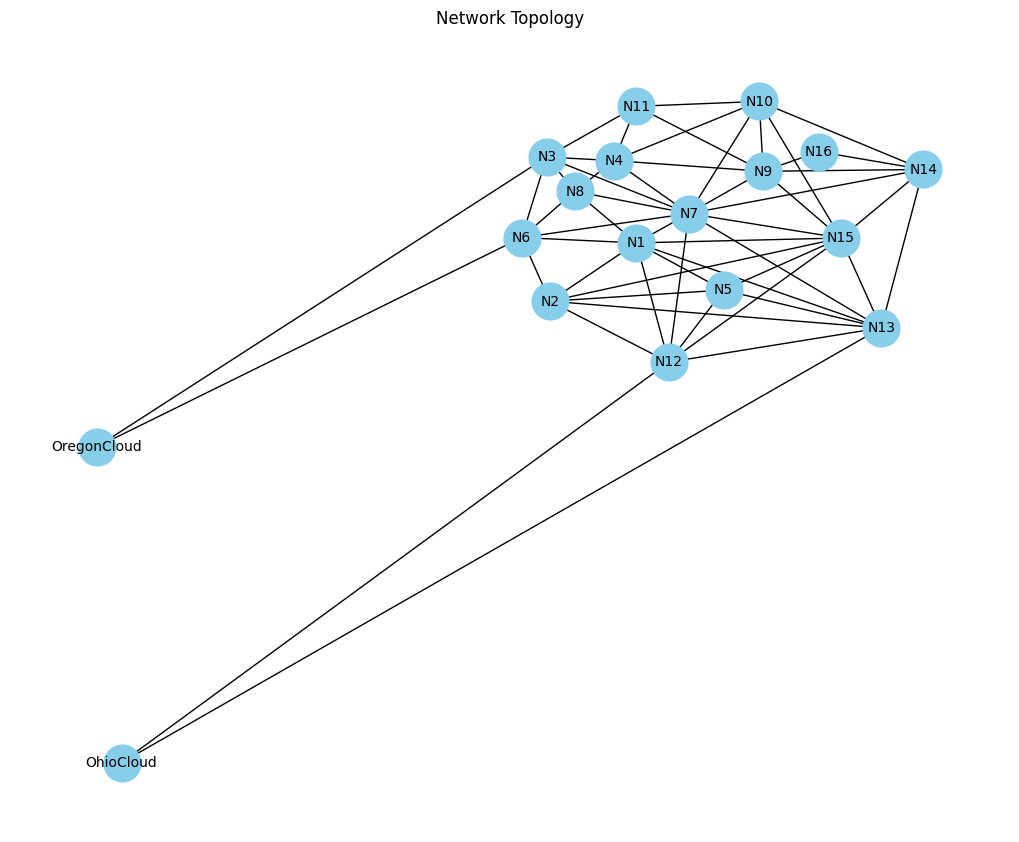

Graph Nodes and their Attributes:
+-------------+--------------------+---------------------+-------------+
|     Node    |    x-coordinate    |     y-coordinate    |    Medium   |
+-------------+--------------------+---------------------+-------------+
|      N1     |       237.0        |        338.0        | Not defined |
|      N2     |       130.0        |        207.0        | Not defined |
|      N3     |       126.0        |        531.0        | Not defined |
|      N4     |       209.0        |        523.0        | Not defined |
|      N5     |       345.0        |        232.0        | Not defined |
|      N6     |        95.0        |        350.0        | Not defined |
|      N7     |       302.0        |        404.0        | Not defined |
|      N8     |       161.0        |        454.0        | Not defined |
|      N9     |       394.0        |        499.0        | Not defined |
|     N10     |       389.0        |        656.0        | Not defined |
|     N11     |  

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from network_classes import *  # Import all classes
from network_functions import *

# Example usage
xml_path = 'Networks/newyork.xml'
validate_xml(xml_path)



nodes, links, demands = read_XMLnetwork(network_name)

G = nx.Graph()
# Populate the network, specifying '5g' as the default medium
#Options include 'fiber', 'ethernet','wifi', '5g', 'lora', and 'p2p_microwave'
populate_network(G, nodes, links, medium='5g')


# Draw the graph
draw_network_graph(G)

#Print node and link attributes
print_node_attributes(G)
print_link_attributes(G)
measure_network_stats(G)


## Generate Users
Here we will generate users

Generate Users: Randomly distrubuted users generated with uniform random distrubution of (x,y) corrdinates around the graph G that represents infrastrcuture. 

Allow options (ex. User_Spread).

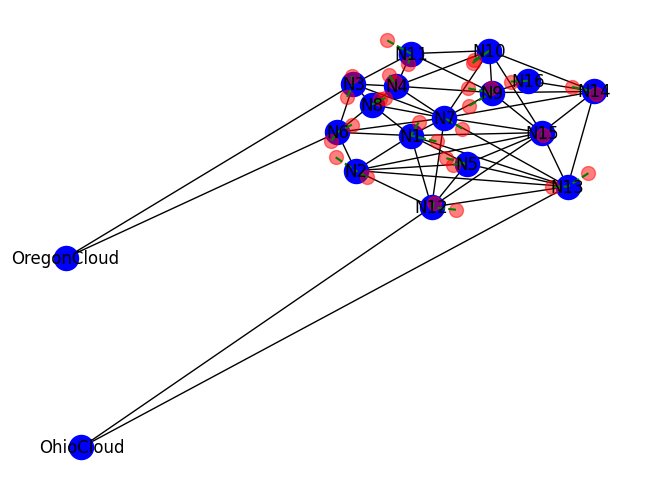

In [3]:
# Specify the number of users you want to generate
# Create the users and their connections
G_users, users, user_connections = create_users(G, NoOfUsers)

# Draw the network and user graphs
pos_G = nx.get_node_attributes(G, 'pos')
pos_G_users = nx.get_node_attributes(G_users, 'pos')

# Draw network nodes
nx.draw(G, pos_G, with_labels=True, node_size=300, style="solid", node_color="blue")
# Draw user nodes
nx.draw(G_users, pos_G_users, with_labels=False, node_size=100, style="dashed", node_color="red", alpha=0.5)
# Draw connections between users and their nearest APs
for user_pos, ap_pos in user_connections:
    plt.plot([user_pos[0], ap_pos[0]], [user_pos[1], ap_pos[1]], color="green", linestyle="dashed")

plt.show()


## Assign Server Properties to each node in a uniform manner


In [4]:

    # Call the function with the JSON file path
associate_edge_devices(G, device_json_path, cloud_server_cost, edge_server_cost)
    
print_edge_device_attributes(G)


+-------------+-------------------------------------------+---------------------------------+------------+--------------+---------+--------+---------+---------------------------------+-------------+--------------+
|     Node    |                    pos                    |               name              | formFactor | architecture |   cpu   | memory | storage |              source             | server_cost | applications |
+-------------+-------------------------------------------+---------------------------------+------------+--------------+---------+--------+---------+---------------------------------+-------------+--------------+
|      N1     |               (237.0, 338.0)              |  Cisco HyperFlex HX220c Edge M5 |    None    |     None     | 34.8GHz |  1TB   |   5TB   |     Edge_Device_Cisco_HX220     |     100     |      []      |
|      N2     |               (130.0, 207.0)              |  Cisco HyperFlex HX220c Edge M5 |    None    |     None     | 34.8GHz |  1TB   |   5

## Assign Applications to users randomly to generate demand:



In [5]:
#associate_user_devices(G_users, traffic_json_path)



# associate_user_devices(G_users, traffic_json_path)
# print_user_device_attributes(G_users)



# print(f"Total users: {len(G_users.nodes())}")
# print_user_device_attributes(G_users)


# Load traffic and user application data, then assign applications to users
associate_user_devices(G_users, traffic_json_path)

# Print user device attributes to check application assignments
print_user_device_attributes(G_users)

# Load container data and associate applications with their required containers
app_to_users, app_objects = associate_app_with_containers(G_users, 'Devices/containers.json')

# Print applications and their associated resources
print_all_applications_and_resources(app_objects)


Starting application association process...
Loaded 8 traffic statistics.
Assigning application to user: user_0
Selected application for user_0: Home Energy
Assigned Home Energy to user user_0 with bandwidth 0.0505 and latency 250.0.
Assigning application to user: user_1
Selected application for user_1: Road Safety
Assigned Road Safety to user user_1 with bandwidth 0.005 and latency 55.0.
Assigning application to user: user_2
Selected application for user_2: Home Energy
Assigned Home Energy to user user_2 with bandwidth 0.0505 and latency 250.0.
Assigning application to user: user_3
Selected application for user_3: Road Safety
Assigned Road Safety to user user_3 with bandwidth 0.005 and latency 55.0.
Assigning application to user: user_4
Selected application for user_4: Road Safety
Assigned Road Safety to user user_4 with bandwidth 0.005 and latency 55.0.
Assigning application to user: user_5
Selected application for user_5: Connected Ambulance
Assigned Connected Ambulance to user user_

## Assign each application and its users to Containers (network_functions + analytics_functions)

In [6]:
# Usage

app_to_users, app_objects = associate_app_with_containers(G_users, containers_json_path)


#print_applications_and_resources(app_objects)

# After associating applications with containers
print_all_applications_and_resources(app_objects)


Starting container association process...
Container association process completed.
+---------------------+------------------------------------------------------------+------------------------------------------------------------------------+-----------------------------------------------------------------------+
|   Application Name  |                      Associated Users                      |                         Service Function Chain                         |                              CNF Details                              |
+---------------------+------------------------------------------------------------+------------------------------------------------------------------------+-----------------------------------------------------------------------+
|     Road Safety     |              user_1, user_3, user_4, user_13               |        Firewall -> VPN -> Safety Protocol -> Alert Notification        |          Firewall: CPU=2.0 GHz, Memory=4.0 GB, Storage=5.0 GB        

# Placement

## Random Microservice Placement + Routing

In [7]:
from collections import defaultdict
import random
import networkx as nx

for user in G_users.nodes(data=True):
    if 'associated_ap' not in user[1] or 'bandwidth' not in user[1]:
        print(f"User {user[0]} missing 'associated_ap' or 'bandwidth' attribute.")


# Initialize data structures to hold server and link states
server_utilization_random = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})
link_utilization_random = defaultdict(float)
accepted_users_count_random = 0
rejected_users_count_random = 0
total_routing_cost_random = 0.0
link_cost_random = defaultdict(float)  # New dictionary to store the cost of each link
total_propagation_delay_random = 0.0  # Initialize variable to hold total propagation delay
# Initialize additional counters
total_edge_servers_used_random = 0
total_cloud_servers_used_random = 0
total_cost_random = 0




# Function to convert string capacity to float (e.g., '3TB' to 3000.0)
def convert_capacity_to_float(capacity_str):
    if 'GHz' in capacity_str:
        return float(capacity_str.replace('GHz', ''))
    elif 'x' in capacity_str:
        # Assuming the format is 'cores x speed' and you want total GHz
        cores, speed = capacity_str.split('x')
        return float(cores) * float(speed)
    elif 'TB' in capacity_str:
        return float(capacity_str.replace('TB', '')) * 1000  # Convert TB to GB
    else:
        return float(capacity_str)


# Function to find a path that can handle the given bandwidth
def find_feasible_path(G, source, target, bandwidth):
    for path in nx.all_simple_paths(G, source=source, target=target, cutoff=10):  # cutoff is optional, for performance
        can_use_path = True
        for i in range(len(path) - 1):
            link = (path[i], path[i + 1])
            link_capacity = G[path[i]][path[i + 1]]['capacity']  # Assuming capacity is in Mbps
            if link_utilization_random[link] + bandwidth > link_capacity:
                can_use_path = False
                break
        if can_use_path:
            return path
    return None


accepted_users_count_random = 0
rejected_users_count_random = 0

from collections import defaultdict
import random
import networkx as nx

# Assuming G, G_users, app_to_users, app_objects, and other necessary variables are already defined and initialized

def random_microservice_placement(G, G_users, app_to_users, app_objects):
    server_utilization_random = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})
    link_utilization_random = defaultdict(float)
    total_routing_cost_random = 0.0
    accepted_users_count_random = 0
    rejected_users_count_random = 0
    total_propagation_delay_random = 0.0
    total_edge_servers_used_random = 0
    total_cloud_servers_used_random = 0

    # Helper function to convert capacity string to float
    def convert_capacity_to_float(capacity_str):
        if 'GHz' in capacity_str:
            return float(capacity_str.replace('GHz', '')) * 1000  # Assuming GHz to MHz conversion
        elif 'TB' in capacity_str:
            return float(capacity_str.replace('TB', '')) * 1000  # Convert TB to GB
        else:
            return float(capacity_str)

    # Main placement loop
    for app_name, users in app_to_users.items():
        app = app_objects.get(app_name, None)
        if not app:
            print(f"No application object found for {app_name}")
            continue

        # Calculate total resources required by the application
        total_cpu = sum(cnf.cpu for cnf in app.cnfs)
        total_mem = sum(cnf.memory for cnf in app.cnfs)
        total_storage = sum(cnf.storage for cnf in app.cnfs)

        # Select a random server
        server = random.choice(list(G.nodes()))
        server_attrs = G.nodes[server]

        # Check if the server can accommodate the application
        if all([
            server_utilization_random[server]['cpu'] + total_cpu <= convert_capacity_to_float(server_attrs['cpu']),
            server_utilization_random[server]['memory'] + total_mem <= convert_capacity_to_float(server_attrs['memory']),
            server_utilization_random[server]['storage'] + total_storage <= convert_capacity_to_float(server_attrs['storage'])
        ]):
            # Update server utilization
            server_utilization_random[server]['cpu'] += total_cpu
            server_utilization_random[server]['memory'] += total_mem
            server_utilization_random[server]['storage'] += total_storage
            if "cloud" in server.lower():
                total_cloud_servers_used_random += 1
            else:
                total_edge_servers_used_random += 1

            # Handle routing for each user assigned to this app
            for user in users:
                user_node = G_users.nodes[user]
                path = find_feasible_path(G, user_node['associated_ap'], server, user_node['bandwidth'])
                if path:
                    # Update link utilization, costs, and propagation delays based on the path
                    for i in range(len(path) - 1):
                        link = (path[i], path[i + 1])
                        link_utilization_random[link] += user_node['bandwidth']
                        link_cost = user_node['bandwidth'] * 1e-3 * routing_cost
                        total_routing_cost_random += link_cost
                        total_propagation_delay_random += G[path[i]][path[i + 1]]['latency']
                    accepted_users_count_random += 1
                else:
                    rejected_users_count_random += 1
        else:
            print(f"Server capacity exceeded for server {server}")
    
    # Summarize and print the results
    print(f"\nTotal Accepted Users: {accepted_users_count_random}")
    print(f"Total Rejected Users: {rejected_users_count_random}")
    print(f"Total Routing Cost: {total_routing_cost_random}")
    print(f"Total Propagation Delay: {total_propagation_delay_random} ms")
    # Include any other summaries you need

# Note: You need to define or adjust `find_feasible_path` to work with your graph setup, 
#       as well as ensure server attributes (cpu, memory, storage) are properly initialized in your graph nodes.



random_microservice_placement(G, G_users, app_to_users, app_objects)


# Random Microservice Placement
for app_name, users in app_to_users.items():
    # Select a random server (node) for this application
    server = random.choice(list(G.nodes()))
    
    # Get the total resource requirements for this application
    container_list = [c for c in containers_data['Containers'] if c['application'] == app_name]
    if container_list:
        containers = container_list[0]
    else:
        print(f"No containers found for the application {app_name}")
        continue  # or handle this case appropriately

    total_cpu = sum(float(c['cpu']) for c in containers['vnfs'] + containers['microservices'])
    total_mem = sum(float(c['memory']) for c in containers['vnfs'] + containers['microservices'])
    total_storage = sum(float(c['storage']) for c in containers['vnfs'] + containers['microservices'])
    
    # Check server capacity and update server utilization
    server_capacity = G.nodes[server]
    if server_utilization_random[server]['cpu'] + total_cpu <= convert_capacity_to_float(server_capacity['cpu']) and \
        server_utilization_random[server]['memory'] + total_mem <= convert_capacity_to_float(server_capacity['memory']) and \
        server_utilization_random[server]['storage'] + total_storage <= convert_capacity_to_float(server_capacity['storage']):
        server_utilization_random[server]['cpu'] += total_cpu
        server_utilization_random[server]['memory'] += total_mem
        server_utilization_random[server]['storage'] += total_storage
        # Check if the server is an edge or cloud server and update the counter
        if "cloud" in server.lower():
            total_cloud_servers_used_random += 1
        else:
            total_edge_servers_used_random += 1
    else:
        print(f"Server capacity exceeded for server {server}")
        continue

    # Routing and link utilization
    for user in users:
        source_node = user_to_node_map[user]
        bandwidth = G_users.nodes[user]['bandwidth']
        path = find_feasible_path(G, source=source_node, target=server, bandwidth=bandwidth)
        
        if path:
            # Update link utilization and total routing cost along this path
            # for i in range(len(path) - 1):
            #     link = (path[i], path[i + 1])
            #     link_utilization_random[link] += bandwidth
            #     total_routing_cost_random += G[path[i]][path[i + 1]]['cost']
            #     accepted_users_count_random += 1
            # Update link utilization and total routing cost along this path
            user_propagation_delay = 0.0  # Initialize the user's total propagation delay to zero
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization_random[link] += bandwidth
                link_cost = bandwidth * 1e-3 * routing_cost
                #link_cost = bandwidth * 1e-3 * G[path[i]][path[i + 1]]['cost']  # bandwidth in Gbps * cost ($/Gb)
                link_cost_random[link] += link_cost  # Accumulate cost for this link
                #total_routing_cost_random += G[path[i]][path[i + 1]]['cost']
                total_routing_cost_random += link_cost  # Update the total routing cost

                # Add up the propagation delay for the current link to the user's total
                user_propagation_delay += propagation_delays.get(link, 0)
                accepted_users_count_random += 1
             # Add this user's propagation delay to the total
            total_propagation_delay_random += user_propagation_delay
        else:
            print(f"Could not find feasible path for user {user}")
            rejected_users_count_random += 1

# Print server and link utilization
# print("Server Utilization:")
# for server, util in server_utilization_random.items():
#     print(f"Server {server}: CPU = {util['cpu']} GHz, Memory = {util['memory']} GB, Storage = {util['storage']} GB")
    
# print("\nLink Utilization:")
# for link, bandwidth in link_utilization_random.items():
#     print(f"Link {link}: {bandwidth} Mbps")

# Print total routing cost
print(f"\nTotal Routing Cost: {total_routing_cost_random}")

#Print total accepted users
print(f"\nTotal Accepted Users: {accepted_users_count_random}")
accepted_percentage_random = accepted_users_count_random/NoOfUsers*100
print(f"\nPercentage of Accepted Users: {accepted_percentage_random}%")


#Print total rejected users
print(f"\nTotal Rejected Users: {rejected_users_count_random}")
rejected_percentage_random = rejected_users_count_random/NoOfUsers*100
print(f"\nPercentage of Rejected Users: {rejected_percentage_random}%")


def print_total_propagation_delay():
    print(f"\nTotal Propagation Delay: {total_propagation_delay_random} ms")

print_total_propagation_delay()

# Additional print statements for the counters
print(f"\nTotal Edge Servers Used: {total_edge_servers_used_random}")
print(f"\nTotal Cloud Servers Used: {total_cloud_servers_used_random}")

total_cost_random = total_routing_cost_random + total_edge_servers_used_random*edge_server_cost + total_cloud_servers_used_random*cloud_server_cost

print(f"\nTotal cost: {total_cost_random}")


User user_0 missing 'associated_ap' or 'bandwidth' attribute.
User user_1 missing 'associated_ap' or 'bandwidth' attribute.
User user_2 missing 'associated_ap' or 'bandwidth' attribute.
User user_3 missing 'associated_ap' or 'bandwidth' attribute.
User user_4 missing 'associated_ap' or 'bandwidth' attribute.
User user_5 missing 'associated_ap' or 'bandwidth' attribute.
User user_6 missing 'associated_ap' or 'bandwidth' attribute.
User user_7 missing 'associated_ap' or 'bandwidth' attribute.
User user_8 missing 'associated_ap' or 'bandwidth' attribute.
User user_9 missing 'associated_ap' or 'bandwidth' attribute.
User user_10 missing 'associated_ap' or 'bandwidth' attribute.
User user_11 missing 'associated_ap' or 'bandwidth' attribute.
User user_12 missing 'associated_ap' or 'bandwidth' attribute.
User user_13 missing 'associated_ap' or 'bandwidth' attribute.
User user_14 missing 'associated_ap' or 'bandwidth' attribute.
User user_15 missing 'associated_ap' or 'bandwidth' attribute.
Us

KeyError: 'associated_ap'

In [ ]:
def random_microservice_placement(G, G_users, app_to_users, app_objects, servers):
    # Initialize the necessary structures for tracking and managing placements.
    accepted_users_count = 0
    rejected_users_count = 0
    total_routing_cost = 0.0

    # Iterate over each application and the users assigned to it.
    for app_name, users in app_to_users.items():
        app = app_objects.get(app_name)
        if not app:
            continue  # If no application object is found, skip to the next.

        # Try to deploy the application on a randomly selected server.
        server = random.choice(list(servers.values()))
        if server.deploy_application(app):
            print(f"Application {app_name} deployed on Server {server.name}")
            for user_id in users:
                user = G_users.nodes[user_id]['user']
                # Simulate the process of setting up the user with the application.
                user.assign_application(app)
                accepted_users_count += 1
        else:
            print(f"Failed to deploy Application {app_name} on Server {server.name}")
            rejected_users_count += len(users)  # All users for this app are rejected.

    # Output the results of the placement attempts.
    print(f"Total Accepted Users: {accepted_users_count}")
    print(f"Total Rejected Users: {rejected_users_count}")
    print(f"Total Routing Cost: {total_routing_cost:.2f}")

    return accepted_users_count, rejected_users_count, total_routing_cost


### Ploting Random Microservice Placement

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Server Utilization Bar Graph
servers = list(server_utilization_random.keys())
cpu_util = [server_utilization_random[s]['cpu'] for s in servers]
mem_util = [server_utilization_random[s]['memory'] for s in servers]
storage_util = [server_utilization_random[s]['storage'] for s in servers]

barWidth = 0.25
r1 = np.arange(len(cpu_util))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, cpu_util, color='b', width=barWidth, edgecolor='grey', label='CPU (GHz)')
plt.bar(r2, mem_util, color='c', width=barWidth, edgecolor='grey', label='Memory (GB)')
plt.bar(r3, storage_util, color='m', width=barWidth, edgecolor='grey', label='Storage (GB)')

plt.xlabel('Servers', fontweight='bold')
plt.ylabel('Utilization')
plt.title('Server Utilization')
plt.xticks([r + barWidth for r in range(len(cpu_util))], servers)

plt.legend()
plt.show()

#**********************************************************************************************************************

# Link Utilization Bar Graph
links = list(link_utilization_random.keys())
bandwidth_util = [link_utilization_random[l] for l in links]
link_names = [f"{l[0]}-{l[1]}" for l in links]

plt.figure(figsize=(10, 6))
plt.bar(link_names, bandwidth_util, color='r', edgecolor='grey')

plt.xlabel('Links')
plt.ylabel('Bandwidth (Mbps)')
plt.title('Link Utilization')
plt.xticks(rotation=45, ha='right')
plt.show()


#**********************************************************************************************************************

# Create a new figure for Accepted and Rejected Users
y_max = 100  # Adjust this value as needed

# Create a new figure for Accepted and Rejected Users
plt.figure(figsize=(10, 6))

# Bar positions for Accepted and Rejected Users
r4 = [x + barWidth for x in r3]

user_percentages = [accepted_percentage_random, rejected_percentage_random]
user_labels = ['Accepted Users', 'Rejected Users']

# Set the bar positions at the center of the ticks
bar_positions = [r + barWidth / 2 for r in r4[:2]]

plt.bar(bar_positions, user_percentages, color=['g', 'r'], width=barWidth, edgecolor='grey')
plt.xlabel('User Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Accepted vs. Rejected Users')

# Set the x-axis ticks at the center of the bars
plt.xticks(bar_positions, user_labels)

# Set the y-axis limit slightly above 100%
plt.ylim(0, y_max)

plt.show()

## Placement using Page Rank in Descending page rank order


In [ ]:
from collections import defaultdict
import random
import networkx as nx
import pandas as pd

# Initialize data structures
server_utilization_pagerank = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})
link_utilization_pagerank = defaultdict(float)
total_routing_cost_pagerank = 0.0
total_propagation_delay_pagerank = 0.0
accepted_users_count_pagerank = 0
rejected_users_count_pagerank = 0

total_edge_servers_used_pagerank = 0
total_cloud_servers_used_pagerank = 0
total_cost_pagerank = 0.0
used_edge_servers = set()
used_cloud_servers = set()


# Page Rank Weights
# Replace this with your actual PageRank data
pagerank_df = PageRank.compute_pagerank(G)
sorted_pagerank = pagerank_df.sort_values(by='value', ascending=False)

# Function to calculate a composite score for server selection
def server_score(pagerank, server_utilization):
    return pagerank - 0.01 * (server_utilization['cpu'] + server_utilization['memory'] + server_utilization['storage'])



# Function to convert string capacity to float (e.g., '3TB' to 3000.0)
def convert_capacity_to_float(capacity_str):
    if 'GHz' in capacity_str:
        return float(capacity_str.replace('GHz', ''))
    elif 'TB' in capacity_str:
        return float(capacity_str.replace('TB', '')) * 1000  # Convert TB to GB
    else:
        return float(capacity_str)

# Function to find a path that can handle the given bandwidth
def find_feasible_path(G, source, target, bandwidth):
    for path in nx.all_simple_paths(G, source=source, target=target, cutoff=50):  # cutoff is optional, for performance
        can_use_path = True
        for i in range(len(path) - 1):
            link = (path[i], path[i + 1])
            link_capacity = G[path[i]][path[i + 1]]['capacity']  # Assuming capacity is in Mbps
            if link_utilization_pagerank[link] + bandwidth > link_capacity:
                can_use_path = False
                break
        if can_use_path:
            return path
    return None

# Microservice Placement using PageRank
for app_name, users in app_to_users.items():
    
    # Sort servers by PageRank and current utilization
    #sorted_pagerank['server_score'] = sorted_pagerank.apply(lambda row: server_score(row['value'], server_utilization_pagerank[row['name']]), axis=1)
    #sorted_servers = sorted_pagerank.sort_values(by='server_score', ascending=False)['name'].tolist()

    #for server in sorted_servers:
    for _, row in sorted_pagerank.iterrows():
        server = row['name']
        
        # Get the total resource requirements for this application
        container_list = [c for c in containers_data['Containers'] if c['application'] == app_name]
        if container_list:
            containers = container_list[0]
        else:
            print(f"No containers found for the application {app_name}")
            break

        total_cpu = sum(float(c['cpu']) for c in containers['vnfs'] + containers['microservices'])
        total_mem = sum(float(c['memory']) for c in containers['vnfs'] + containers['microservices'])
        total_storage = sum(float(c['storage']) for c in containers['vnfs'] + containers['microservices'])
        
        # Check server capacity
        server_capacity = G.nodes[server]
        if server_utilization_pagerank[server]['cpu'] + total_cpu <= convert_capacity_to_float(server_capacity['cpu']) and \
           server_utilization_pagerank[server]['memory'] + total_mem <= convert_capacity_to_float(server_capacity['memory']) and \
           server_utilization_pagerank[server]['storage'] + total_storage <= convert_capacity_to_float(server_capacity['storage']):
            
            # Update server utilization
            server_utilization_pagerank[server]['cpu'] += total_cpu
            server_utilization_pagerank[server]['memory'] += total_mem
            server_utilization_pagerank[server]['storage'] += total_storage

            # Update the total number of edge/cloud servers used
            if "cloud" in server.lower():
                used_cloud_servers.add(server)
            else:
               used_edge_servers.add(server)
            break
        else:
            continue  # Move to next highest PageRank server

    # Routing and link utilization
    for user in users:
        source_node = user_to_node_map[user]
        bandwidth = G_users.nodes[user]['bandwidth']
        path = find_feasible_path(G, source=source_node, target=server, bandwidth=bandwidth)
        
        if path:
            user_propagation_delay = 0.0  # Initialize the user's total propagation delay to zero
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization_pagerank[link] += bandwidth
                link_cost = bandwidth * 1e-3 * routing_cost
                #total_routing_cost_pagerank += G[path[i]][path[i + 1]]['cost']
                total_routing_cost_pagerank += link_cost
                user_propagation_delay += propagation_delays.get(link, 0)  # Assuming you have a propagation_delays dict
            
            # Add this user's propagation delay to the total
            total_propagation_delay_pagerank += user_propagation_delay
            accepted_users_count_pagerank += 1
        else:
            print(f"Could not find feasible path for user {user}")
            rejected_users_count_pagerank += 1

# Print server and link utilization
print("Server Utilization:")
for server, util in server_utilization_pagerank.items():
    print(f"Server {server}: CPU = {util['cpu']} GHz, Memory = {util['memory']} GB, Storage = {util['storage']} GB")
    
print("\nLink Utilization:")
for link, bandwidth in link_utilization_pagerank.items():
    continue
    #print(f"Link {link}: {bandwidth} Mbps")

# Print total routing cost
print(f"\nTotal Routing Cost: {total_routing_cost_pagerank}")


# Print total propagation delay
print(f"\nTotal Propagation Delay: {total_propagation_delay_pagerank} ms")

# Print total accepted and rejected users
print(f"\nTotal Accepted Users: {accepted_users_count_pagerank}")
accepted_percentage_pagerank = accepted_users_count_pagerank / NoOfUsers * 100
print(f"\nPercentage of Accepted Users: {accepted_percentage_pagerank}%")

print(f"\nTotal Rejected Users: {rejected_users_count_pagerank}")
rejected_percentage_pagerank = rejected_users_count_pagerank / NoOfUsers * 100
print(f"\nPercentage of Rejected Users: {rejected_percentage_pagerank}%")

total_edge_servers_used_pagerank = len(used_edge_servers)
total_cloud_servers_used_pagerank = len(used_cloud_servers)

# Additional print statements for the counters
print(f"\nTotal Edge Servers Used: {total_edge_servers_used_pagerank}")
print(f"\nTotal Cloud Servers Used: {total_cloud_servers_used_pagerank}")

total_cost_pagerank = total_routing_cost_pagerank + total_edge_servers_used_pagerank*edge_server_cost + total_cloud_servers_used_pagerank*cloud_server_cost
print(f"\nTotal cost: {total_cost_pagerank}")






In [ ]:

# Debug Script: Print the state of all relevant variables for diagnostics

# Ensure all necessary imports are present
from collections import defaultdict
import networkx as nx

# Assuming the existence of variables and data structures from your context

# Print app_to_users content
print("Debug - app_to_users content:", app_to_users)


# Print the graph G nodes and edges if needed
print("\nGraph G Nodes and Edges:")
print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges(data=True))

# Print feasible paths (Assuming you have a way to collect these)
# This part needs to be integrated with your path finding and processing logic
# Here's an example placeholder for how you might structure this
print("\nFeasible Paths:")
# Assuming feasible_paths is a list of tuples (path, bandwidth)
# You would need to modify your path finding to collect these
feasible_paths = []  # Placeholder for where you would collect feasible paths
for path, bandwidth in feasible_paths:
    print(f"Path: {path} with bandwidth {bandwidth} Mbps")

# Print any other specific variables you're interested in
# For example, capacities, apps, users, etc.
# Example placeholder for server capacities
print("\nServer Capacities:")
# Assuming a dictionary or graph node attribute for server capacities
for server in G.nodes():
    attrs = G.nodes[server]
    print(f"Server {server}: CPU = {attrs.get('cpu', 'N/A')}, Memory = {attrs.get('memory', 'N/A')}, Storage = {attrs.get('storage', 'N/A')}")

# Add similar sections for any other variables or data structures you wish to debug



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have server_utilization, link_utilization, accepted_percentage, and rejected_percentage already defined

# Server Utilization Bar Graph
servers = list(server_utilization_pagerank.keys())
cpu_util = [server_utilization_pagerank[s]['cpu'] for s in servers]
mem_util = [server_utilization_pagerank[s]['memory'] for s in servers]
storage_util = [server_utilization_pagerank[s]['storage'] for s in servers]

barWidth = 0.25
r1 = np.arange(len(cpu_util))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, cpu_util, color='b', width=barWidth, edgecolor='grey', label='CPU (GHz)')
plt.bar(r2, mem_util, color='c', width=barWidth, edgecolor='grey', label='Memory (GB)')
plt.bar(r3, storage_util, color='m', width=barWidth, edgecolor='grey', label='Storage (GB)')

plt.xlabel('Servers', fontweight='bold')
plt.ylabel('Utilization')
plt.title('Server Utilization')
plt.xticks([r + barWidth for r in range(len(cpu_util))], servers)

plt.legend()
plt.show()

# Link Utilization Bar Graph
links = list(link_utilization_pagerank.keys())
bandwidth_util = [link_utilization_pagerank[l] for l in links]
link_names = [f"{l[0]}-{l[1]}" for l in links]

plt.figure(figsize=(10, 6))
plt.bar(link_names, bandwidth_util, color='r', edgecolor='grey')

plt.xlabel('Links')
plt.ylabel('Bandwidth (Mbps)')
plt.title('Link Utilization')
plt.xticks(rotation=45, ha='right')
plt.show()

# Accepted vs Rejected Users Bar Graph
y_max = 100  # Adjust this value as needed

plt.figure(figsize=(10, 6))

user_percentages = [accepted_percentage_pagerank, rejected_percentage_pagerank]
user_labels = ['Accepted Users', 'Rejected Users']

bar_positions = np.arange(len(user_labels))

plt.bar(bar_positions, user_percentages, color=['g', 'r'], edgecolor='grey')

plt.xlabel('User Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Accepted vs. Rejected Users')
plt.xticks(bar_positions, user_labels)
plt.ylim(0, y_max)

plt.show()


## Adaptive VNF Placement Algorithm

1. *Determining Service Order Algorithm*: This algorithm takes several parameters like sets of users, SFCs, bandwidth requirements, and computational demands and times for CNFs. It calculates the urgency and criticality for each SFC and sorts them.
2. *Placement Algorithm*: For each application in the sorted Service Order Queue, it tries to place the most critical VNF on the Central_Server. If that's not possible, it calculates a Candidate score for each node and sorts them to find the next best candidate.
3. *Experimental Setup and Results*: You have graphs for the average number of servers used, SFC length, algorithm execution time, CPU utilization, and link utilization.

In [ ]:
from collections import defaultdict
import random
import networkx as nx

# Initialize data structures to hold server and link states
server_utilization_adaptive = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})
link_utilization_adaptive = defaultdict(float)
link_cost_adaptive = defaultdict(float)
total_routing_cost_adaptive = 0.0
total_propagation_delay_adaptive = 0.0
accepted_users_count_adaptive = 0
rejected_users_count_adaptive = 0

# Initialize additional counters
total_edge_servers_used_adaptive = 0
total_cloud_servers_used_adaptive = 0
total_cost_adaptive = 0.0

def convert_capacity_to_float(capacity_str):
    if 'GHz' in capacity_str:
        return float(capacity_str.replace('GHz', ''))
    elif 'TB' in capacity_str:
        return float(capacity_str.replace('TB', '')) * 1000
    else:
        return float(capacity_str)

def find_feasible_path(G, source, target, bandwidth):
    try:
        path = nx.shortest_path(G, source=source, target=target, weight='cost')
        can_use_path = all(
            link_utilization_adaptive[(path[i], path[i + 1])] + bandwidth <= G[path[i]][path[i + 1]]['capacity']
            for i in range(len(path) - 1)
        )
        if can_use_path:
            return path
    except nx.NetworkXNoPath:
        pass
    return None

def compute_link_cost(G, path, bandwidth):
    cost = 0.0
    for i in range(len(path) - 1):
        link = (path[i], path[i + 1])
        cost += bandwidth * 1e-3 * routing_cost
        link_cost_adaptive[link] += cost
    return cost

# ... (your existing code for populating G, G_users, app_to_users, user_to_node_map, containers_data, propagation_delays)

for app_name, users in app_to_users.items():
    sorted_servers = sorted(G.nodes(), key=lambda x: server_utilization_adaptive[x]['cpu'])
    
    for server in sorted_servers:
        container_list = [c for c in containers_data['Containers'] if c['application'] == app_name]
        if not container_list:
            print(f"No containers found for the application {app_name}")
            break

        containers = container_list[0]
        total_cpu = sum(float(c['cpu']) for c in containers['vnfs'] + containers['microservices'])
        total_mem = sum(float(c['memory']) for c in containers['vnfs'] + containers['microservices'])
        total_storage = sum(float(c['storage']) for c in containers['vnfs'] + containers['microservices'])
        
        server_capacity = G.nodes[server]
        if all(
            server_utilization_adaptive[server][resource] + total <= convert_capacity_to_float(server_capacity[resource])
            for resource, total in [('cpu', total_cpu), ('memory', total_mem), ('storage', total_storage)]
        ):
            for resource, total in [('cpu', total_cpu), ('memory', total_mem), ('storage', total_storage)]:
                server_utilization_adaptive[server][resource] += total
            
            # Update the total number of edge/cloud servers used
            if "cloud" in server.lower():
                total_cloud_servers_used_adaptive += 1
            else:
                total_edge_servers_used_adaptive += 1
            
            break

    for user in users:
        source_node = user_to_node_map[user]
        bandwidth = G_users.nodes[user]['bandwidth']
        path = find_feasible_path(G, source=source_node, target=server, bandwidth=bandwidth)
        
        if path:
            user_propagation_delay = 0.0
            path_cost = compute_link_cost(G, path, bandwidth)
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization_adaptive[link] += bandwidth
                total_routing_cost_adaptive += bandwidth * 1e-3 * routing_cost
                user_propagation_delay += propagation_delays.get(link, 0)
            total_propagation_delay_adaptive += user_propagation_delay
            accepted_users_count_adaptive += 1
        else:
            print(f"Could not find feasible path for user {user}")
            rejected_users_count_adaptive += 1

# Additional print statements for the counters
print(f"\nTotal Edge Servers Used: {total_edge_servers_used_adaptive}")
print(f"\nTotal Cloud Servers Used: {total_cloud_servers_used_adaptive}")

total_cost_adaptive = total_routing_cost_adaptive + total_edge_servers_used_adaptive*edge_server_cost + total_cloud_servers_used_adaptive*cloud_server_cost
print(f"\nTotal cost: {total_cost_adaptive} $")

print("\nCost for Each Link:")
for link, cost in link_cost_adaptive.items():
    print(f"Link {link}: {cost} $")

print(f"\nTotal routing cost: {total_routing_cost_adaptive} $")
print(f"\nTotal Propagation Delay: {total_propagation_delay_adaptive} ms")
print(f"\nTotal Accepted Users: {accepted_users_count_adaptive}")


In [ ]:
# Adaptive Placement Plotting

import matplotlib.pyplot as plt
import numpy as np

# Server Utilization Bar Graph
servers = list(server_utilization_adaptive.keys())
cpu_util = [server_utilization_adaptive[s]['cpu'] for s in servers]
mem_util = [server_utilization_adaptive[s]['memory'] for s in servers]
storage_util = [server_utilization_adaptive[s]['storage'] for s in servers]

barWidth = 0.25
r1 = np.arange(len(cpu_util))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, cpu_util, color='b', width=barWidth, edgecolor='grey', label='CPU (GHz)')
plt.bar(r2, mem_util, color='c', width=barWidth, edgecolor='grey', label='Memory (GB)')
plt.bar(r3, storage_util, color='m', width=barWidth, edgecolor='grey', label='Storage (GB)')

plt.xlabel('Servers', fontweight='bold')
plt.ylabel('Utilization')
plt.title('Server Utilization')
plt.xticks([r + barWidth for r in range(len(cpu_util))], servers)

plt.legend()
plt.show()

# Link Utilization Bar Graph
links = list(link_utilization_adaptive.keys())
bandwidth_util = [link_utilization_adaptive[l] for l in links]
link_names = [f"{l[0]}-{l[1]}" for l in links]

plt.figure(figsize=(10, 6))
plt.bar(link_names, bandwidth_util, color='r', edgecolor='grey')

plt.xlabel('Links')
plt.ylabel('Bandwidth (Mbps)')
plt.title('Link Utilization')
plt.xticks(rotation=45, ha='right')
plt.show()

# Accepted vs Rejected Users Bar Graph
y_max = 100  # Adjust this value as needed

accepted_percentage_adaptive = (accepted_users_count_adaptive / NoOfUsers) * 100
rejected_percentage_adaptive = (rejected_users_count_adaptive / NoOfUsers) * 100

plt.figure(figsize=(10, 6))

user_percentages = [accepted_percentage_adaptive, rejected_percentage_adaptive]
user_labels = ['Accepted Users', 'Rejected Users']

bar_positions = np.arange(len(user_labels))

plt.bar(bar_positions, user_percentages, color=['g', 'r'], edgecolor='grey')

plt.xlabel('User Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Accepted vs. Rejected Users')
plt.xticks(bar_positions, user_labels)
plt.ylim(0, y_max)

plt.show()


# Combined Plots for Random Placement, Page Rank Placement and Adaptive Placement Algorithms

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Server Utilization Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Assuming you have server_utilization_adaptive, server_utilization_pagerank, server_utilization_random
server_labels = ['Random', 'PageRank', 'Adaptive']

# CPU Utilization
cpu_util = [
    np.mean([server_utilization_random[s]['cpu'] for s in server_utilization_random]),
    np.mean([server_utilization_pagerank[s]['cpu'] for s in server_utilization_pagerank]),
    np.mean([server_utilization_adaptive[s]['cpu'] for s in server_utilization_adaptive])
]

# Memory Utilization
mem_util = [
    np.mean([server_utilization_random[s]['memory'] for s in server_utilization_random]),
    np.mean([server_utilization_pagerank[s]['memory'] for s in server_utilization_pagerank]),
    np.mean([server_utilization_adaptive[s]['memory'] for s in server_utilization_adaptive])
]

# Storage Utilization
storage_util = [
    np.mean([server_utilization_random[s]['storage'] for s in server_utilization_random]),
    np.mean([server_utilization_pagerank[s]['storage'] for s in server_utilization_pagerank]),
    np.mean([server_utilization_adaptive[s]['storage'] for s in server_utilization_adaptive])
]

barWidth = 0.25
r1 = np.arange(len(cpu_util))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#*********************************************************************************************************************************************
# Plotting CPU Utilization
axs[0].bar(r1, cpu_util, color='b', width=barWidth, edgecolor='grey', label='CPU (GHz)')
axs[0].set_title('Average CPU Utilization')
axs[0].set_xticks([r + barWidth for r in range(len(cpu_util))])
axs[0].set_xticklabels(server_labels)
axs[0].legend()
#*********************************************************************************************************************************************
# Plotting Memory Utilization
axs[1].bar(r1, mem_util, color='c', width=barWidth, edgecolor='grey', label='Memory (GB)')
axs[1].set_title('Average Memory Utilization')
axs[1].set_xticks([r + barWidth for r in range(len(mem_util))])
axs[1].set_xticklabels(server_labels)
axs[1].legend()
#*********************************************************************************************************************************************
# Plotting Storage Utilization
axs[2].bar(r1, storage_util, color='m', width=barWidth, edgecolor='grey', label='Storage (GB)')
axs[2].set_title('Average Storage Utilization')
axs[2].set_xticks([r + barWidth for r in range(len(storage_util))])
axs[2].set_xticklabels(server_labels)
axs[2].legend()

plt.show()

#*********************************************************************************************************************************************
# Plotting Link Utilization
plt.figure()
avg_link_util = [
    np.mean(list(link_utilization_random.values())),
    np.mean(list(link_utilization_pagerank.values())),
    np.mean(list(link_utilization_adaptive.values()))
]

plt.bar(server_labels, avg_link_util, color='r', edgecolor='grey')
plt.title('Average Link Utilization')
plt.xlabel('Algorithm')
plt.ylabel('Bandwidth (Mbps)')
plt.show()

#*********************************************************************************************************************************************

# Plotting % of Accepted Users
plt.figure()
accepted_users_percentage = [
    (accepted_users_count_random / (accepted_users_count_random + rejected_users_count_random)) * 100 if accepted_users_count_random + rejected_users_count_random > 0 else 0,
    (accepted_users_count_pagerank / (accepted_users_count_pagerank + rejected_users_count_pagerank)) * 100 if accepted_users_count_pagerank + rejected_users_count_pagerank > 0 else 0,
    (accepted_users_count_adaptive / (accepted_users_count_adaptive + rejected_users_count_adaptive)) * 100 if accepted_users_count_adaptive + rejected_users_count_adaptive > 0 else 0
]

plt.bar(server_labels, accepted_users_percentage, color='g', edgecolor='grey')
plt.title('Percentage of Accepted Users')
plt.xlabel('Algorithm')
plt.ylabel('Percentage (%)')
plt.show()

#*********************************************************************************************************************************************

# Plotting % of Rejected Users
plt.figure()
rejected_users_percentage = [
    (rejected_users_count_random / (accepted_users_count_random + rejected_users_count_random)) * 100 if accepted_users_count_random + rejected_users_count_random > 0 else 0,
    (rejected_users_count_pagerank / (accepted_users_count_pagerank + rejected_users_count_pagerank)) * 100 if accepted_users_count_pagerank + rejected_users_count_pagerank > 0 else 0,
    (rejected_users_count_adaptive / (accepted_users_count_adaptive + rejected_users_count_adaptive)) * 100 if accepted_users_count_adaptive + rejected_users_count_adaptive > 0 else 0
]

plt.bar(server_labels, rejected_users_percentage, color='g', edgecolor='grey')
plt.title('Percentage of Rejected Users')
plt.xlabel('Algorithm')
plt.ylabel('Percentage (%)')
plt.show()

#*********************************************************************************************************************************************
# New Plot for Total Propagation Delay
plt.figure()
total_propagation_delay_values = [
    total_propagation_delay_random,
    total_propagation_delay_pagerank,
    total_propagation_delay_adaptive
]

plt.bar(server_labels, total_propagation_delay_values, color='orange', edgecolor='grey')
plt.title('Total Propagation Delay')
plt.xlabel('Algorithm')
plt.ylabel('Delay (ms)')
plt.show()


#*********************************************************************************************************************************************

# New Plot for Total Routing Cost
plt.figure()
total_routing_cost_values = [
    total_routing_cost_random,
    total_routing_cost_pagerank,
    total_routing_cost_adaptive
]

fig, ax = plt.subplots()
ax.bar(server_labels, total_routing_cost_values, color='purple', edgecolor='grey')

plt.title('Total Routing Cost')
plt.xlabel('Algorithm')
plt.ylabel('Cost (USD)')
plt.show()
#*********************************************************************************************************************************************

#Plot for total cost

plt.figure()
total_cost_values = [
    total_cost_random,
    total_cost_pagerank,
    total_cost_adaptive
]

fig, ax = plt.subplots()
ax.bar(server_labels, total_cost_values, color='purple', edgecolor='grey')

plt.title('Total Cost')
plt.xlabel('Algorithm')
plt.ylabel('Cost (USD)')
plt.show()

#*********************************************************************************************************************************************

# Data
algorithms = ['Random', 'PageRank', 'Adaptive']
edge_servers = [
    total_edge_servers_used_random,
    total_edge_servers_used_pagerank,
    total_edge_servers_used_adaptive
]
cloud_servers = [
    total_cloud_servers_used_random,
    total_cloud_servers_used_pagerank,
    total_cloud_servers_used_adaptive
]

# Set up the bar chart
x = np.arange(len(algorithms))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, edge_servers, width, label='Edge Servers')
rects2 = ax.bar(x + width/2, cloud_servers, width, label='Cloud Servers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Algorithms')
ax.set_title('Total Edge and Cloud Servers Used by Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Autolabel function to display the label on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


print("Edge Servers Used (Random): ", total_edge_servers_used_random)
print("Cloud Servers Used (Random): ", total_cloud_servers_used_random)




# GAMS


## GAMS Connection


In [ ]:
import subprocess

def run_gams_model(gams_path, model_file, log_option, output_gdx):
    """
    Run a GAMS model using Python.

    Parameters:
    gams_path (str): Full path to the GAMS executable.
    model_file (str): The GAMS model file to run.
    log_option (str): Log level option for GAMS.
    input_gdx (str): GDX file for input data.
    output_gdx (str): GDX file for output data.
    """

    # Construct the command to run the GAMS model
    command = f'"{gams_path}" {model_file} lo={log_option} gdx={output_gdx}'

    # Run the command and capture output
    try:
        completed_process = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print("GAMS model executed successfully.")
        print(completed_process.stdout.decode())
        print(completed_process.stderr.decode())
    except subprocess.CalledProcessError as e:
        print("An error occurred in GAMS model execution.")
        print(e)
        print(e.stdout.decode())
        print(e.stderr.decode())

# Path to your GAMS installation
gams_path = 'C:\\GAMS\\win64\\24.9\\gams'

# Your GAMS model file
model_file = 'm2'

# Define the path to your input GDX file
input_gdx = 'Optimization_input.gdx'

# Log option and output GDX file name
log_option = '3'
output_gdx = 'Optimization_output'

# Run the GAMS model
run_gams_model(gams_path, model_file, log_option, output_gdx)


In [ ]:
import os
import gams
from gams import GamsWorkspace

# Define paths to your GAMS installation and GAMS model file
gams_path = 'C:\\GAMS\\win64\\24.9\\gams.exe'
model_file = 'm2.gms'
input_gdx = 'data.gdx'
output_gdx = 'Optimization_output.gdx'

# Get the absolute path to the current directory
current_directory = os.getcwd()

# Construct the absolute path to the output GDX file
output_gdx_absolute = os.path.join(current_directory, output_gdx)

# Function to verify GDX contents
def verify_gdx_contents(gdx_file_path):
    ws = gams.GamsWorkspace()
    db = ws.add_database_from_gdx(gdx_file_path)
    
    for symbol in db:
        print(f"Symbol: {symbol.name}, Type: {type(symbol).__name__}")
        if isinstance(symbol, gams.GamsSet):
            print("  Elements:")
            for record in symbol:
                print(f"    {record.key(0)}")
        elif isinstance(symbol, gams.GamsParameter):
            print("  Values:")
            if len(symbol.domains) == 2:  # Check if the parameter has two-dimensional indices
                for record in symbol:
                    print(f"    {record.keys[0]}-{record.keys[1]}: {record.value}")
            elif symbol.name == "Topology":  # Check if the parameter is 'Topology'
                for record in symbol:
                    print(f"    {record.key(0)}-{record.keys[0]}: {record.value}")
            else:
                try:
                    for record in symbol:
                        print(f"    {record.key(0)}: {record.value}")
                except Exception as e:
                    print(f"    Error accessing values: {e}")
        elif isinstance(symbol, gams.GamsVariable):
            print("  Values:")
            try:
                for record in symbol:
                    print(f"    {record.key}: {record.level}")
            except Exception as e:
                print(f"    Error accessing levels: {e}")
        else:
            print("  Unknown type")






# Verify the output GDX file contents
verify_gdx_contents(output_gdx_absolute)


In [ ]:
import os
import subprocess
import networkx as nx
from gams import GamsWorkspace

# Define paths and settings
gams_system_directory = 'C:\\GAMS\\win64\\24.9'
gdx_file_path = 'data.gdx'
output_gdx = 'Optimization_output.gdx'
current_directory = os.getcwd()

# Initialize GAMS workspace
ws = GamsWorkspace(system_directory=gams_system_directory, working_directory=current_directory)

# Verify GDX contents function
def verify_gdx_contents(gdx_file_path):
    db = ws.add_database_from_gdx(gdx_file_path)
    
    for symbol in db:
        print(f"Symbol: {symbol.name}, Type: {type(symbol).__name__}")
        if isinstance(symbol, gams.GamsSet):
            print("  Elements:")
            for record in symbol:
                print(f"    {record.key(0)}")
        elif isinstance(symbol, gams.GamsParameter):
            print("  Values:")
            if len(symbol.domains) == 2:  # Check if the parameter has two-dimensional indices
                for record in symbol:
                    print(f"    {record.keys[0]}-{record.keys[1]}: {record.value}")
            else:
                try:
                    for record in symbol:
                        print(f"    {record.key(0)}: {record.value}")
                except Exception as e:
                    print(f"    Error accessing values: {e}")
        else:
            print("  Unknown type")

# Export data from GDX to Excel
def export_to_excel(gdxxrw_path, gdx_file_path, excel_file_path):
    try:
        subprocess.run([gdxxrw_path, gdx_file_path, f"par={excel_file_path}", "rng=A1", "wbt=par", "wb=par"], check=True)
        print("Data exported successfully from GDX to Excel.")
    except subprocess.CalledProcessError as e:
        print(f"Error exporting data from GDX to Excel: {e}")

# Read data from GDX file, process it, and export results back to GDX
def process_gdx_data(gdx_file_path, output_file_path):
    db = ws.add_database()
    db.execute_load(gdx_file_path)

    # Process data, perform calculations, etc. (as in your script)

    # Export results back to GDX file
    db_out = ws.add_database()
    # Add results to db_out
    db_out.export(output_file_path)
    print("Results exported successfully to GDX.")

# Verify GDX contents
verify_gdx_contents(gdx_file_path)

# Export data from GDX to Excel
gdxxrw_path = os.path.join(gams_system_directory, 'gdxxrw.exe')
excel_file_path = 'input.xlsx'
export_to_excel(gdxxrw_path, gdx_file_path, excel_file_path)

# Process GDX data and export results back to GDX
process_gdx_data(gdx_file_path, output_gdx)



# Get symbols from the GDX file
topology_data = db.get_symbol("Topology")
link_delay_data = db.get_symbol("LinkDelay")
app_definition_data = db.get_symbol("App_Definition")
cpu_req_data = db.get_symbol("CPU_Req")
bw_req_data = db.get_symbol("BW_Req")
users_ap_data = db.get_symbol("Users_AP")
users_app_data = db.get_symbol("Users_App")
host_utilization_cap_data = db.get_symbol("HostUtilizationCap")
scs_data = db.get_symbol("SCs")
m_data = db.get_symbol("M")
link_cap_data = db.get_symbol("LinkCap")
user_bw_data = db.get_symbol("UserBW")

# Populate parameters
topology = {element[0]: element[1] for element in topology_data}
link_delay = {link[0]: link[1] for link in link_delay_data}
app_definition = {app[0]: app[1] for app in app_definition_data}
cpu_req = {node[0]: node[1] for node in cpu_req_data}
bw_req = {user_node[0]: user_node[1] for user_node in bw_req_data}
users_ap = {user_node[0]: user_node[1] for user_node in users_ap_data}
users_app = {user_app[0]: user_app[1] for user_app in users_app_data}
host_utilization_cap = {node[0]: node[1] for node in host_utilization_cap_data}
scs = {sc[0]: sc[1] for sc in scs_data}
m = {key[0]: key[1] for key in m_data}
link_cap = {link[0]: link[1] for link in link_cap_data}
user_bw = {user[0]: user[1] for user in user_bw_data}

# Initialize data structures to hold server and link states
server_utilization = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})
link_utilization = defaultdict(float)
accepted_users_count = 0
rejected_users_count = 0
total_routing_cost = 0.0
link_cost = defaultdict(float)
total_propagation_delay = 0.0
total_edge_servers_used = 0
total_cloud_servers_used = 0
total_cost = 0

# Define a function to find a feasible path for a user
def find_feasible_path(G, source, target, bandwidth):
    for path in nx.all_simple_paths(G, source=source, target=target, cutoff=10):  # cutoff is optional, for performance
        can_use_path = True
        for i in range(len(path) - 1):
            link = (path[i], path[i + 1])
            if link_utilization[link] + bandwidth > link_cap[link]:
                can_use_path = False
                break
        if can_use_path:
            return path
    return None

# Process each user
for user, app in users_app.items():
    user_node = users_ap[user]  # Get the node associated with the user
    bandwidth = user_bw[user]  # Get the bandwidth requirement for the user

    # Check if the user's node has sufficient CPU capacity
    if server_utilization[user_node]['cpu'] + cpu_req[user_node] <= host_utilization_cap[user_node]:
        # Find a feasible path for the user
        path = find_feasible_path(topology, user_node, app_definition[app], bandwidth)
        if path:
            # Update link utilization and total routing cost along this path
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization[link] += bandwidth
                total_routing_cost += link_delay[link] * bandwidth
            # Update server utilization
            server_utilization[user_node]['cpu'] += cpu_req[user_node]
            accepted_users_count += 1
        else:
            rejected_users_count += 1
    else:
        rejected_users_count += 1

# Calculate total propagation delay
for user in users_ap.keys():
    user_node = users_ap[user]
    user_app = users_app[user]
    propagation_delay = link_delay.get((user_node, app_definition[user_app]), 0)
    total_propagation_delay += propagation_delay

# Calculate total edge and cloud servers used
total_edge_servers_used = sum(1 for node in server_utilization if 'cloud' not in node.lower())
total_cloud_servers_used = sum(1 for node in server_utilization if 'cloud' in node.lower())

# Calculate total cost
total_cost = total_routing_cost + sum(host_utilization_cap.values())

# Write results back to a GDX file if needed
output_file_path = output_gdx
db_out = ws.add_database()
accepted_users_set = db_out.add_set("AcceptedUsers")
rejected_users_set = db_out.add_set("RejectedUsers")
total_prop_delay_set = db_out.add_set("TotalPropDelay")
total_edge_servers_set = db_out.add_set("TotalEdgeServers")
total_cloud_servers_set = db_out.add_set("TotalCloudServers")
total_cost_set = db_out.add_set("TotalCost")
accepted_users_set.add_record().value = accepted_users_count
rejected_users_set.add_record().value = rejected_users_count
total_prop_delay_set.add_record().value = total_propagation_delay
total_edge_servers_set.add_record().value = total_edge_servers_used
total_cloud_servers_set.add_record().value = total_cloud_servers_used
total_cost_set.add_record().value = total_cost
db_out.export(output_file_path)

# Print some results
print("User Acceptance Results:")
print(f"Accepted Users: {accepted_users_count}")
print(f"Rejected Users: {rejected_users_count}")
print(f"Total Propagation Delay: {total_propagation_delay} ms")
print(f"Total Edge Servers Used: {total_edge_servers_used}")
print(f"Total Cloud Servers Used: {total_cloud_servers_used}")
print(f"Total Cost: {total_cost}")


## Create Test GDX File

In [ ]:
import os
from gams import GamsWorkspace, GamsParameter
from collections import defaultdict
import networkx as nx

# Define paths and settings
gams_system_directory = 'C:\\GAMS\\win64\\24.9'
gdx_file_path = 'data.gdx'
output_gdx = 'Optimization_output.gdx'
current_directory = os.getcwd()

# Initialize GAMS workspace
ws = GamsWorkspace(system_directory=gams_system_directory, working_directory=current_directory)

# Read data from the GDX file and print contents
db = ws.add_database_from_gdx(gdx_file_path)
print("Contents of the GDX file before creating a new GDX file:")
for symbol in db:
    print(f"Symbol: {symbol.name}")
    for record in symbol:
        print(record)
    print()


#
# Read data from the GDX file and print contents
db = ws.add_database_from_gdx(gdx_file_path)
for symbol in db:
    print(f"Symbol: {symbol.name}")
    for record in symbol:
        print(record)
    print()

# Get symbols from the GDX file
topology_data = db.get_symbol("Topology")
link_delay_data = db.get_symbol("LinkDelay")
cpu_req_data = db.get_symbol("CPU_Req")
bw_req_data = db.get_symbol("BW_Req")
users_ap_data = db.get_symbol("Users_AP")
users_app_data = db.get_symbol("Users_App")
host_utilization_cap_data = db.get_symbol("HostUtilizationCap")
link_cap_data = db.get_symbol("LinkCap")
user_bw_data = db.get_symbol("UserBW")


# Initialize data structures to hold server and link states
server_utilization_adaptive = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})
link_utilization_adaptive = defaultdict(float)
link_cost_adaptive = defaultdict(float)
total_routing_cost_adaptive = 0.0
total_propagation_delay_adaptive = 0.0
accepted_users_count_adaptive = 0
rejected_users_count_adaptive = 0

# Initialize additional counters
total_edge_servers_used_adaptive = 0
total_cloud_servers_used_adaptive = 0
total_cost_adaptive = 0.0

# Populate parameters
topology = {element[0]: element[1] for element in topology_data}
link_delay = {link[0]: link[1] for link in link_delay_data}
cpu_req = {node[0]: node[1] for node in cpu_req_data}
bw_req = {user_node[0]: user_node[1] for user_node in bw_req_data}
users_ap = {user_node[0]: user_node[1] for user_node in users_ap_data}
users_app = {user_app[0]: user_app[1] for user_app in users_app_data}
host_utilization_cap = {node[0]: node[1] for node in host_utilization_cap_data}
link_cap = {link[0]: link[1] for link in link_cap_data}
user_bw = {user[0]: user[1] for user in user_bw_data}

# Define a function to find a feasible path for a user
def find_feasible_path(G, source, target, bandwidth):
    for path in nx.all_simple_paths(G, source=source, target=target, cutoff=10):  # cutoff is optional, for performance
        can_use_path = True
        for i in range(len(path) - 1):
            link = (path[i], path[i + 1])
            if link_utilization_adaptive[link] + bandwidth > link_cap[link]:
                can_use_path = False
                break
        if can_use_path:
            return path
    return None

# Process each user
for user, app in users_app.items():
    user_node = users_ap[user]  # Get the node associated with the user
    bandwidth = user_bw[user]  # Get the bandwidth requirement for the user

    # Check if the user's node has sufficient CPU capacity
    if server_utilization_adaptive[user_node]['cpu'] + cpu_req[user_node] <= host_utilization_cap[user_node]:
        # Find a feasible path for the user
        path = find_feasible_path(topology, user_node, app, bandwidth)
        if path:
            # Update link utilization and total routing cost along this path
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization_adaptive[link] += bandwidth
                total_routing_cost_adaptive += link_delay[link] * bandwidth
            # Update server utilization
            server_utilization_adaptive[user_node]['cpu'] += cpu_req[user_node]
            accepted_users_count_adaptive += 1
        else:
            rejected_users_count_adaptive += 1
    else:
        rejected_users_count_adaptive += 1

# Calculate total propagation delay
for user in users_ap.keys():
    user_node = users_ap[user]
    app = users_app[user]
    propagation_delay = link_delay.get((user_node, app), 0)
    total_propagation_delay_adaptive += propagation_delay

# Calculate total edge and cloud servers used
total_edge_servers_used_adaptive = sum(1 for node in server_utilization_adaptive if 'cloud' not in node.lower())
total_cloud_servers_used_adaptive = sum(1 for node in server_utilization_adaptive if 'cloud' in node.lower())

# Calculate total cost
total_cost_adaptive = total_routing_cost_adaptive + sum(host_utilization_cap.values())

# Write results back to a GDX file
output_file_path = output_gdx
db_out = ws.add_database()
accepted_users_set = db_out.add_set("AcceptedUsers")
rejected_users_set = db_out.add_set("RejectedUsers")
total_prop_delay_set = db_out.add_set("TotalPropDelay")
total_edge_servers_set = db_out.add_set("TotalEdgeServers")
total_cloud_servers_set = db_out.add_set("TotalCloudServers")
total_cost_set = db_out.add_set("TotalCost")
accepted_users_set.add_record().value = accepted_users_count_adaptive
rejected_users_set.add_record().value = rejected_users_count_adaptive
total_prop_delay_set.add_record().value = total_propagation_delay_adaptive
total_edge_servers_set.add_record().value = total_edge_servers_used_adaptive
total_cloud_servers_set.add_record().value = total_cloud_servers_used_adaptive
total_cost_set.add_record().value = total_cost_adaptive
db_out.export(output_file_path)

# Print some results
print("User Acceptance Results:")
print(f"Accepted Users: {accepted_users_count_adaptive}")
print(f"Rejected Users: {rejected_users_count_adaptive}")
print(f"Total Propagation Delay: {total_propagation_delay_adaptive} ms")
print(f"Total Edge Servers Used: {total_edge_servers_used_adaptive}")
print(f"Total Cloud Servers Used: {total_cloud_servers_used_adaptive}")
print(f"Total Cost: {total_cost_adaptive}")


In [ ]:
import sys
# Add the GAMS Python API path to sys.path
gams_api_path = "C:\\GAMS\\win64\\24.9\\apifiles\\Python\\api_36"
sys.path.append(gams_api_path)
from gams import *


# Initialize GAMS workspace and database
ws = GamsWorkspace()
db = ws.add_database()

# Example data (replace with your actual data)
apps_data = ['App1', 'App2', 'App3']
app_definition_data = {(1, 'App1'): 1, (2, 'App2'): 1, (3, 'App3'): 1}  # Assuming (VNF, App): Value format
bw_req_data = {'App1': 100, 'App2': 200, 'App3': 300}

# Create GAMS sets and parameters
apps_set = db.add_set('Apps', 1, 'Set of IoT Apps')
app_def_param = db.add_parameter_dc('App_Definition', [apps_set], 'VNFs -> Apps relation')
bw_req_param = db.add_parameter('BW_Req', 1, 'Bandwidth Requirement')

# Populate data
for app in apps_data:
    apps_set.add_record(app)

for (vnf, app), val in app_definition_data.items():
    app_def_param.add_record(app).value = val

for app, bw in bw_req_data.items():
    bw_req_param.add_record(app).value = bw

# Write to GDX file
gdx_filename = 'Optimization_input.gdx'
db.export(gdx_filename)

print(f'GDX file created: {gdx_filename}')


## Create json File - Raw

In [ ]:
import json
import networkx as nx

# Assuming your data (G, G_users, app_to_users, containers_data) is already loaded or computed
# For demonstration, these will be empty or simple structures
# G = nx.Graph()
# G_users = nx.Graph()
# app_to_users = {}  # Example: {'App1': ['User1', 'User2'], 'App2': ['User3']}
# containers_data = {}  # Example: {'Containers': [{'application': 'App1', 'vnfs': [{'name': 'VNF1'}]}]}

# Step 1: Extract data
# Extract Apps and Users
apps = list(app_to_users.keys())
users = list(G_users.nodes)

# Extract Servers and VNFs
servers = list(G.nodes)
vnfs = set()  # To avoid duplicates
for container in containers_data.get('Containers', []):
    for vnf in container.get('vnfs', []):
        vnfs.add(vnf['name'])

# Step 2: Format data for GAMS
# Convert to GAMS-friendly format (e.g., lists, dictionaries)

# Example: Create a dictionary for App_Definition
app_definition = {}
for app, vnf_list in app_to_users.items():
    for vnf in vnf_list:
        app_definition[(vnf, app)] = 1  # or other relevant value

# Initialize a new dictionary for the adjusted structure
app_definition_adjusted = {}

# Loop through the original app_definition dictionary
for key, value in app_definition.items():
    user, app = key  # Unpack the tuple
    if user not in app_definition_adjusted:
        app_definition_adjusted[user] = {}
    app_definition_adjusted[user][app] = value

# Step 3: Write data to a file (GDX or text)
# For simplicity, we'll write to a JSON file (GDX writing requires GAMS Python API)

data_for_gams = {
    'Apps': apps,
    'Users': users,
    'Servers': servers,
    'VNFs': list(vnfs),
    'AppDefinition': app_definition_adjusted
    # Add other parameters as needed
}

# Function to convert tuple keys to string keys
def convert_tuple_keys_to_string(data):
    new_data = {}
    for key, value in data.items():
        if isinstance(key, tuple):
            # Convert the tuple to a string, e.g., "('user_0', 'City Surveillance')" 
            string_key = str(key)  
        else:
            string_key = key
        new_data[string_key] = value
    return new_data

def convert_tuple_keys_to_strings(data):
    if isinstance(data, dict):
        return {str(key): convert_tuple_keys_to_strings(value) for key, value in data.items()}
    return data


# Convert the tuple keys in your data dictionary
data_for_gams_converted = {k: convert_tuple_keys_to_string(v) if isinstance(v, dict) else v for k, v in data_for_gams.items()}

# Write the converted data to a JSON file
with open('data_for_gams_converted.json', 'w') as f:
    json.dump(data_for_gams_converted, f, indent=4)

# Note: You'll need to read this JSON in GAMS or use the GAMS Python API to create a GDX file

# Continue from the previous code

# Step 4: Additional data processing for GAMS parameters


def get_user_ap(user, G_users):
    # Retrieve the associated AP for the user from the graph
    return G_users.nodes[user].get('associated_ap')  # Replace 'associated_ap' with the actual attribute name

def get_server_capacity(server, G):
    # Retrieve the capacity of the server from the graph
    return G.nodes[server].get('capacity')  # Replace 'capacity' with the actual attribute name

def get_link_delay(u, v, G):
    # Retrieve the delay of the link from the graph
    return G[u][v].get('delay')  # Replace 'delay' with the actual attribute name


# Example: Users_AP and Users_App
users_ap = {}
users_app = {}
for user in users:
    # Assuming function get_user_ap returns the associated AP for the user
    ap = get_user_ap(user, G_users)  # Replace with actual function/logic
    app = G_users.nodes[user]['application']  # Replace with actual data structure
    users_ap[(user, ap)] = 1  # Indicates user is connected to this AP
    users_app[(user, app)] = 1  # Indicates user is using this app

# Example: HostUtilizationCap
host_utilization_cap = {}
for server in servers:
    # Assuming function get_server_capacity returns the capacity for the server
    capacity = get_server_capacity(server, G)  # Replace with actual function/logic
    host_utilization_cap[server] = capacity  # Replace with actual value



# Example: Topology and LinkDelay
topology = {}
link_delay = {}
for u, v in G.edges:
    topology[(u, v)] = 1  # Example: 1 indicates a link exists
    # Assuming function get_link_delay returns the delay for the link
    delay = get_link_delay(u, v, G)  # Replace with actual function/logic
    link_delay[(u, v)] = delay

# Adjusting Users_AP
users_ap_adjusted = {}
for key, value in users_ap.items():
    user, ap = key
    if user not in users_ap_adjusted:
        users_ap_adjusted[user] = {}
    users_ap_adjusted[user][ap] = value

# Adjusting Users_App
users_app_adjusted = {}
for key, value in users_app.items():
    user, app = key
    if user not in users_app_adjusted:
        users_app_adjusted[user] = {}
    users_app_adjusted[user][app] = value

# Adjusting Topology
topology_adjusted = {}
for key, value in topology.items():
    u, v = key
    topology_adjusted[f"{u}-{v}"] = value  # Concatenate with a delimiter

# Adjusting LinkDelay
link_delay_adjusted = {}
for key, value in link_delay.items():
    u, v = key
    #link_delay_adjusted[f"{u}-{v}"] = value  # Concatenate with a delimiter
    #link_delay_adjusted[f"{u}-{v}"] = 100  # Concatenate with a delimiter
    link_delay_adjusted = {f"{u}-{v}": propagation_delays.get((u, v)) for u, v in G.edges()}




# Step 5: Add additional data to the dictionary for GAMS
data_for_gams.update({
    'Users_AP': users_ap_adjusted,
    'Users_App': users_app_adjusted,
    'HostUtilizationCap': host_utilization_cap,
    'Topology': topology_adjusted,
    'LinkDelay': link_delay_adjusted
    # Add other parameters as needed
})

# Set the host utilization capacity to 100 for each server
for server in data_for_gams['HostUtilizationCap'].keys():
    data_for_gams['HostUtilizationCap'][server] = 100


# Convert tuple keys to strings in the data_for_gams dictionary
data_for_gams_converted = convert_tuple_keys_to_strings(data_for_gams)

# Write the converted data to the JSON file
# Convert the data_for_gams dictionary to JSON
with open('data_for_gams_converted.json', 'w') as f:
    json.dump(data_for_gams, f, indent=4)


# Note: The functions get_user_ap, get_server_capacity, and get_link_delay are placeholders
# and should be replaced with your actual data retrieval logic.


## Read json file and create GDX

In [ ]:
import json
from gams import *
import os
import subprocess  # Needed to call GAMS executable

# Assuming the JSON loading and GAMS database population code remains the same

# Define the path to the GAMS executable
gams_executable_path = "C:\\GAMS\\win64\\25.1\\gams.exe"  # Adjust this to your GAMS installation path

# Define the GAMS model file (assuming it's in the same directory as this script)
gams_model_file = "vnf_placement.gms"  # Make sure this matches your GAMS model file name

# Define the output directory for GAMS run
gams_output_dir = "C:\\Users\\youse\\Documents\\Github\\VNF-python"  # Adjust as needed

# Function to run the GAMS model
def run_gams_model(gams_exec_path, model_file, gdx_file, output_dir):
    # Construct the GAMS command
    command = f'"{gams_exec_path}" "{model_file}" gdxin="{gdx_file}" lo=2 gdx="{os.path.join(output_dir, "output.gdx")}"'
    # Execute the command
    try:
        subprocess.run(command, check=True, shell=True)
        print("GAMS model executed successfully.")
    except subprocess.CalledProcessError as e:
        print(f"An error occurred in GAMS model execution: {e}")

# Export the database to a GDX file
gdx_file_path = os.path.join(gams_output_dir, "data.gdx")
try:
    db.export(gdx_file_path)
    print(f"GDX file created successfully at: {gdx_file_path}")
except Exception as e:
    print(f"An error occurred during GDX file creation: {e}")

# Run the GAMS model with the created GDX file
run_gams_model(gams_executable_path, os.path.join(gams_output_dir, gams_model_file), gdx_file_path, gams_output_dir)

# Add additional code here to retrieve and process results from GAMS, if necessary


## Solve GAMS Model

In [ ]:
import json
from gams import *
import os
import csv

# Load the JSON data
with open('data_for_gams_converted.json', 'r') as f:
    data = json.load(f)

# Initialize a GAMS workspace
ws = GamsWorkspace()

# Create a new GAMS database
db = ws.add_database()

# Sample data (replace with your actual data)
VNFs = ['VNF1', 'VNF2', 'VNF3']
Apps = ['App1', 'App2', 'App3']
Servers = ['Server1', 'Server2', 'Server3']
Users = ['User1', 'User2', 'User3']
HostUtilizationCap = 100  # Example value

# Adding sets to the database
for set_name, elements in zip(['VNFs', 'Apps', 'Servers', 'Users'], [VNFs, Apps, Servers, Users]):
    gams_set = db.add_set(set_name, 1)
    for element in elements:
        gams_set.add_record(element)

# Adding HostUtilizationCap parameter
host_utilization_param = db.add_parameter("HostUtilizationCap", 1, "Servers")
for server in Servers:
    host_utilization_param.add_record(server).value = HostUtilizationCap

# Define other parameters (replace with actual data)
# Example structure for parameters (modify as per your data structure):
Users_AP = {(user, server): 1 for user in Users for server in Servers}  # Example data
Users_App = {(user, app): 1 for user in Users for app in Apps}  # Example data
Topology = {(server1, server2): 1 for server1 in Servers for server2 in Servers}  # Example data
LinkDelay = {(server1, server2): 10 for server1 in Servers for server2 in Servers}  # Example data
App_Definition = {(vnf, app): 1 for vnf in VNFs for app in Apps}  # Example data
BW_Req = {app: 50 for app in Apps}  # Example data
CPU_Req = {vnf: 10 for vnf in VNFs}  # Example data
LinkCap = {(server1, server2): 1000 for server1 in Servers for server2 in Servers}  # Example data
UserBW = {user: 20 for user in Users}  # Example data
UserSC = {(vnf, user): 1 for vnf in VNFs for user in Users}  # Example data
SCs = {(user, vnf1, vnf2): 1 for user in Users for vnf1 in VNFs for vnf2 in VNFs}  # Example data

# Add parameters to the database
# This is a generalized way to add parameters, modify as needed for your specific data structure


# Export the database to a GDX file
gdx_file_path = "C:\\Users\\youse\\Documents\\Github\\VNF-python\\output.gdx"  # Change to your desired output path
db.export(gdx_file_path)



import subprocess

def run_gams_model(gams_path, model_file, log_option, output_gdx):
    """
    Run a GAMS model using Python.

    Parameters:
    gams_path (str): Full path to the GAMS executable.
    model_file (str): The GAMS model file to run.
    log_option (str): Log level option for GAMS.
    input_gdx (str): GDX file for input data.
    output_gdx (str): GDX file for output data.
    """

    # Construct the command to run the GAMS model
    command = f'"{gams_path}" {model_file} lo={log_option} gdx={output_gdx}'

    # Run the command and capture output
    try:
        completed_process = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print("GAMS model executed successfully.")
        print(completed_process.stdout.decode())
        print(completed_process.stderr.decode())
    except subprocess.CalledProcessError as e:
        print("An error occurred in GAMS model execution.")
        print(e)
        print(e.stdout.decode())
        print(e.stderr.decode())

# Path to your GAMS installation
gams_path = 'C:\\GAMS\\win64\\24.9\\gams'

# Your GAMS model file
model_file = 'm2'

# Define the path to your input GDX file
input_gdx = 'data.gdx'

# Log option and output GDX file name
log_option = '3'
output_gdx = 'Optimization_output'

# Run the GAMS model
run_gams_model(gams_path, model_file, log_option, output_gdx)


In [ ]:
import subprocess

def run_gams_model(gams_executable_path, model_file_path, log_option, input_gdx_path, output_gdx_path):
    """
    Run a GAMS model using Python through subprocess.

    Args:
    gams_executable_path (str): Full path to the GAMS executable.
    model_file_path (str): Full path to the GAMS model file (.gms) to run.
    log_option (str): GAMS log option for verbosity (e.g., '3' for detailed log).
    input_gdx_path (str): Full path to the input GDX file.
    output_gdx_path (str): Full path where the output GDX file will be saved.
    """
    # Construct the command string to run the GAMS model
    command = f'"{gams_executable_path}" "{model_file_path}" lo={log_option} gdx="{output_gdx_path}" gdxin="{input_gdx_path}"'
    
    try:
        # Execute the command
        completed_process = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)
        # Print the standard output from GAMS
        print("GAMS model executed successfully:\n", completed_process.stdout.decode())
    except subprocess.CalledProcessError as e:
        # Print any errors encountered during GAMS execution
        print("An error occurred in GAMS model execution:\n", e.stderr.decode())

# Path to the GAMS executable
gams_executable_path = 'C:\\GAMS\\win64\\24.9\\gams.exe'

# Full path to your GAMS model file
model_file_path = 'C:\\Users\\youse\\Documents\\Github\\VNF-python\\m2.gms'

# Log option for GAMS
log_option = '3'

# Full path to your input GDX file
input_gdx_path = 'C:\\Users\\youse\\Documents\\Github\\VNF-python\\data.gdx'

# Full path where the output GDX file should be saved
output_gdx_path = 'C:\\Users\\youse\\Documents\\Github\\VNF-python\\Optimization_output.gdx'

# Run the GAMS model with specified parameters
run_gams_model(gams_executable_path, model_file_path, log_option, input_gdx_path, output_gdx_path)


# Print variables that have been read so far

In [ ]:
from prettytable import PrettyTable


def write_to_file(file_path, data):
    with open(file_path, 'a') as file:  # Append mode
        file.write(data + "\n")


def print_and_save_servers(G, file_path):
    table = PrettyTable(["Server", "CPU", "Memory", "Storage"])
    for node, attrs in G.nodes(data=True):
        cpu = f"{attrs.get('cpu', 'N/A')} GHz"
        memory = f"{attrs.get('memory', 'N/A')} GB"
        storage = f"{attrs.get('storage', 'N/A')} TB"
        table.add_row([node, cpu, memory, storage])
    print("Servers and their capacities:\n" + table.get_string())
    write_to_file(file_path, "Servers and their capacities:\n" + table.get_string())

def print_and_save_network_graph_with_index(G, file_path):
    table = PrettyTable(["#", "Link", "Capacity", "Cost", "Latency"])
    for index, (u, v, attrs) in enumerate(G.edges(data=True), start=1):
        table.add_row([index, f"{u}-{v}", attrs.get('capacity', 'N/A'), attrs.get('cost', 'N/A'), attrs.get('latency', 'N/A')])
    print("\nNetwork Graph (Servers and Links):\n" + table.get_string())
    write_to_file(file_path, "\nNetwork Graph (Servers and Links):\n" + table.get_string())

def print_and_save_user_graph(G_users, file_path):
    table = PrettyTable(["User", "Connected Node", "Application", "Bandwidth", "Latency"])
    for user, attrs in G_users.nodes(data=True):
        table.add_row([user, attrs.get('associated_ap', 'N/A'), attrs.get('application', 'N/A'), attrs.get('bandwidth', 'N/A'), attrs.get('latency', 'N/A')])
    print("\nUser Graph:\n" + table.get_string())
    write_to_file(file_path, "\nUser Graph:\n" + table.get_string())

def print_and_save_users_and_apps(app_to_users, user_to_node_map, file_path):
    table = PrettyTable(["Application", "User", "Connected Node"])
    for app, users in app_to_users.items():
        for user in users:
            table.add_row([app, user, user_to_node_map.get(user, 'N/A')])
    print("\nUsers and Applications:\n" + table.get_string())
    write_to_file(file_path, "\nUsers and Applications:\n" + table.get_string())

def print_and_save_application_to_cnfs_mapping(containers_data, file_path):
    for application in containers_data.get('Containers', []):
        app_name = application.get('application', 'Unknown Application')
        cnfs_table = PrettyTable(["Application", "Type", "Name", "CPU (Cores)", "Memory (GB)", "Storage (GB)"])
        for cnf in application.get('vnfs', []):  # Network Functions
            cnfs_table.add_row([app_name, "Network Function", cnf['name'], cnf['cpu'], cnf['memory'], cnf['storage']])
        for analytics_cnf in application.get('microservices', []):  # Analytics Functions
            cnfs_table.add_row([app_name, "Analytics Function", analytics_cnf['name'], analytics_cnf['cpu'], analytics_cnf['memory'], analytics_cnf['storage']])
        print(cnfs_table.get_string())
        write_to_file(file_path, cnfs_table.get_string() + "\n")

# Define a function to orchestrate all printing and saving operations
def orchestrate_all(file_path):
    # Ensure the file is cleared before writing
    open(file_path, 'w').close()
    
    # Call each function with the file path to append data
    print_and_save_servers(G, file_path)
    print_and_save_network_graph_with_index(G, file_path)
    print_and_save_user_graph(G_users, file_path)
    print_and_save_users_and_apps(app_to_users, user_to_node_map, file_path)
    print_and_save_application_to_cnfs_mapping(containers_data, file_path)

# Specify the path for the output file
#output_file_path = "complete_network_mapping.txt"

# Call the orchestrating function
#orchestrate_all(output_file_path)



from prettytable import PrettyTable

def generate_comprehensive_table(containers_data, app_to_users):
    table = PrettyTable(["App ID", "Application", "CNF Type", "CNF Name", "CPU (Cores)", "Memory (GB)", "Storage (GB)", "Associated Users"])
    
    app_id = 1  # Initialize application ID counter
    for container in containers_data['Containers']:
        app_name = container['application']
        # Gather all users associated with this application
        users = ', '.join(app_to_users.get(app_name, []))
        
        # Process each CNF (Network Function and Analytics Function)
        for cnf in container.get('vnfs', []) + container.get('microservices', []):
            cnf_type = "Network Function" if cnf in container.get('vnfs', []) else "Analytics Function"
            table.add_row([app_id, app_name, cnf_type, cnf['name'], cnf['cpu'], cnf['memory'], cnf['storage'], users])
        
        app_id += 1  # Increment application ID for the next application
    
    print(table)
    # Save the table to a file
    with open("comprehensive_network_mapping.txt", "w") as f:
        f.write(table.get_string())

# Assuming `containers_data` and `app_to_users` are defined
#generate_comprehensive_table(containers_data, app_to_users)


from prettytable import PrettyTable

def generate_sorted_cnf_user_summary(containers_data, app_to_users):
    # Initialize dictionaries to hold CNF details and associated user count for each type
    network_functions = {}
    analytics_functions = {}

    # Loop through each container (application) to gather CNF and user details
    for container in containers_data:
        app_name = container['application']
        users = app_to_users.get(app_name, [])  # Get users associated with this application
        
        # Process both Network Functions (vnfs) and Analytics Functions (microservices)
        for cnf_type, cnf_list in [('Network Function', container.get('vnfs', [])), 
                                   ('Analytics Function', container.get('microservices', []))]:
            for cnf in cnf_list:
                cnf_name = cnf['name']
                # Determine which dictionary to use based on the CNF type
                if cnf_type == 'Network Function':
                    cnf_dict = network_functions
                else:
                    cnf_dict = analytics_functions
                
                # Key to uniquely identify CNFs by name and type
                cnf_key = (cnf_name, cnf_type)
                
                # Initialize or update the CNF entry in the dictionary
                if cnf_key not in cnf_dict:
                    cnf_dict[cnf_key] = {'applications': set(), 'users': set()}
                cnf_dict[cnf_key]['applications'].add(app_name)
                cnf_dict[cnf_key]['users'].update(users)
    
    # Sort the network functions and analytics functions separately
    sorted_network_functions = sorted(network_functions.items(), key=lambda item: len(item[1]['users']), reverse=True)
    sorted_analytics_functions = sorted(analytics_functions.items(), key=lambda item: len(item[1]['users']), reverse=True)
    
    # Merge the sorted lists into a single list
    sorted_cnfs = sorted_network_functions + sorted_analytics_functions
    
    # Create the summary table
    summary_table = PrettyTable(["CNF ID", "CNF Name", "CNF Type", "Applications", "Associated Users", "User Count"])
    cnf_id = 1
    for (cnf_name, cnf_type), details in sorted_cnfs:
        applications_str = ', '.join(sorted(details['applications']))
        users_str = ', '.join(sorted([str(user.split('_')[-1]) for user in details['users']]))
        user_count = len(details['users'])
        summary_table.add_row([cnf_id, cnf_name, cnf_type, applications_str, users_str, user_count])
        cnf_id += 1
    
    return summary_table

def write_summary_to_file(summary_table, file_path):
    with open(file_path, 'w') as file:
        file.write(str(summary_table))

# Assuming `containers_data` and `app_to_users` are correctly populated
# Correctly call the function with your actual data
summary_table = generate_sorted_cnf_user_summary(containers_data, app_to_users)
write_summary_to_file(summary_table, "sorted_cnf_user_summary.txt")







# Test GAMS with Classes Approach

## Network Configuration Classes and Orchestration

This documentation covers the implementation and usage of a set of Python classes designed to model a network's configuration and an orchestration function to aggregate and output this configuration. These tools are ideal for representing and managing complex network topologies within simulation environments or for documentation purposes.


**Base Classes**
* NetworkResource: Represents basic computational resources (CPU, memory, storage) that can be associated with various network entities.

* NetworkEntity: An abstract base class for all network entities. It supports resource updates and serves as the superclass for more specific entity types.

**Entity Classes**
- Server: Models a server within the network, holding resources and identifiable by a unique ID.

- Link: Represents a network link between two points, characterized by its source, destination, capacity, cost, and latency.

- User: Describes a network user, including their associated access point, application usage, bandwidth, and latency requirements.

- CNF (Container Network Function): Defines a containerized network function or service, including its type and resource requirements.

- Application: Encapsulates an application, potentially comprising multiple CNFs, and supports dynamic CNF association.

In [ ]:
from prettytable import PrettyTable
# Base class for network resources
class NetworkResource:
    def __init__(self, cpu=0, memory=0, storage=0):
        self.cpu = cpu
        self.memory = memory
        self.storage = storage

# Base class for all network entities
class NetworkEntity:
    def __init__(self, id, resources=None):
        self.id = id
        self.resources = resources or NetworkResource()

    def update_resources(self, cpu_delta=0, memory_delta=0, storage_delta=0):
        self.resources.cpu += cpu_delta
        self.resources.memory += memory_delta
        self.resources.storage += storage_delta

class Server(NetworkEntity):
    def __init__(self, id, resources):
        super().__init__(id, resources)

    @staticmethod
    def print_and_save(G, file_path, status=None):
        table = PrettyTable(["ID", "CPU (GHz)", "Memory (GB)", "Storage (TB)"])
        for node, attrs in G.nodes(data=True):
            if attrs.get('type', '') == 'server':
                resources = attrs['resources']
                table.add_row([node, resources.cpu, resources.memory, resources.storage])
        print(table)
        write_to_file(file_path, table.get_string(title="Servers"))

class Link:
    @staticmethod
    def print_and_save(G, file_path):
        table = PrettyTable(["Source", "Destination", "Capacity", "Cost", "Latency"])
        for u, v, attrs in G.edges(data=True):
            table.add_row([u, v, attrs.get('capacity', 'N/A'), attrs.get('cost', 'N/A'), attrs.get('latency', 'N/A')])
        print(table)
        write_to_file(file_path, table.get_string(title="Links"))

class User:
    @staticmethod
    def print_and_save(G_users, file_path):
        table = PrettyTable(["User", "Associated AP", "Application", "Bandwidth", "Latency"])
        for user, attrs in G_users.nodes(data=True):
            table.add_row([user, attrs.get('associated_ap', 'N/A'), attrs.get('application', 'N/A'), attrs.get('bandwidth', 'N/A'), attrs.get('latency', 'N/A')])
        print(table)
        write_to_file(file_path, table.get_string(title="Users"))

class CNF(NetworkEntity):
    def __init__(self, id, resources, cnf_type='NF'):
        super().__init__(id, resources)
        self.cnf_type = cnf_type

class Application(NetworkEntity):
    def __init__(self, id, resources=None, sfc_id=None):
        super().__init__(id, resources)
        self.sfc_id = sfc_id
        self.cnfs = []  # Assuming CNFs are added as objects of class CNF or its children

    # Method to add a CNF to the application
    def add_cnf(self, cnf):
        self.cnfs.append(cnf)

    @staticmethod
    def print_and_save_applications(containers_data, file_path):
        # Check if containers_data is a list of applications directly
        if isinstance(containers_data, list) and all(isinstance(app, dict) for app in containers_data):
            for app_data in containers_data:
                # Each app_data is a dict, potentially representing an Application object
                table = PrettyTable(["Application ID", "Type", "Name", "CPU (Cores)", "Memory (GB)", "Storage (GB)"])
                # Assuming 'vnfs' and 'microservices' are keys in each app_data dict
                cnfs = app_data.get('vnfs', []) + app_data.get('microservices', [])
                for cnf in cnfs:
                    # Assuming cnf is a dict with keys 'name', 'cpu', 'memory', 'storage'
                    table.add_row([app_data.get('application'), cnf.get('type', 'N/A'), cnf['name'], cnf.get('cpu', 'N/A'), cnf.get('memory', 'N/A'), cnf.get('storage', 'N/A')])
                print(table)
                write_to_file(file_path, table.get_string(title=f"Application: {app_data.get('application')}"))
        else:
            print("Invalid containers_data format. Expected a list of dictionaries representing applications.")


## Utility Functions
- write_to_file: A helper function to append data to a specified file, ensuring readability with added newlines.
- orchestrate_all: An orchestration function that aggregates information from network entities (servers, links, users, applications) and outputs this data, both printed and saved to a file.

In [ ]:
import networkx as nx

# Helper function to write data to a file
def write_to_file(file_path, data):
    with open(file_path, 'a') as file:
        file.write(data + "\n\n")  # Add extra newlines for readability

# Orchestration function to call the print and save functions for all entities
def orchestrate_all(G, G_users, containers_data, file_path):
    # Clear the file before starting
    open(file_path, 'w').close()
    
    # Print and save servers, links, users, applications, and CNFs
    Server.print_and_save(G, file_path)
    Link.print_and_save(G, file_path)
    User.print_and_save(G_users, file_path)
    Application.print_and_save_applications(containers_data, file_path)

# Assuming G, G_users, and containers_data are defined elsewhere
file_path = "network_details.txt"
orchestrate_all(G, G_users, containers_data, file_path)


## Lets connect with GAMS

In [ ]:
import os
import sys



# Define paths
workspace_dir = os.getcwd()
gdx_file_path = os.path.join(workspace_dir, 'input.gdx')

# Initialize GAMS workspace
ws = GamsWorkspace(working_directory=workspace_dir)

# Create a new GDX file
db = ws.add_database()

# Add dummy data
# Creating a set named 'nodes' and a parameter 'capacity'
nodes = db.add_set("nodes", 1, "Network nodes")
nodes.add_record("Node1")
nodes.add_record("Node2")

capacity = db.add_parameter("capacity", 1, "Capacity of nodes")
capacity.add_record("Node1").value = 100
capacity.add_record("Node2").value = 200

# Export the database to GDX
db.export(gdx_file_path)
print(f"Created GDX file with dummy data at {gdx_file_path}")

# Load the GDX file
db_imported = ws.add_database_from_gdx(gdx_file_path)
print("Contents of the GDX file:")

# Iterate over all symbols in the database
for symbol in db_imported:
    symbol_type = symbol.__class__.__name__
    # Check if the symbol is a Set
    if symbol_type == "GamsSet":
        print(f"Set: {symbol.name}")
        for rec in symbol:
            print(f"  - {rec.keys[0]}")
    # Check if the symbol is a Parameter
    elif symbol_type == "GamsParameter":
        print(f"Parameter: {symbol.name}")
        for rec in symbol:
            print(f"  - {rec.keys[0]}: {rec.value}")
    # Add more checks as necessary for other types like GamsVariable, GamsEquation, etc.


## Test GAMS connection with dummy model

In [ ]:
'''Explanation:

The code initializes the GAMS workspace and defines the paths for input and output GDX files. It ensures that the GAMS Python API is accessible by adjusting the system path to include the directory where the API files are located (gams_api_dir).
It creates a new GDX file (input.gdx) with dummy data representing network nodes and their capacities. This is achieved by utilizing the GAMS Python API to add sets and parameters to a GAMS database (db) and exporting it to a GDX file.
The dummy data is loaded into the GAMS workspace from the input GDX file, and its contents are printed. This demonstrates how the GAMS Python API allows for seamless interaction with GAMS databases and GDX files, enabling easy data exchange between Python and GAMS.
The GAMS model (test_model.gms) is executed using the input GDX file as input, and the results are stored in output.gdx. This is done by running the GAMS model from the command line using the os.system() function, passing the input and output GDX file paths as arguments.
The output GDX file is read, and its contents are printed. The GAMS Python API is again utilized to load the output GDX file into the GAMS workspace and iterate over its symbols to access and display the data.
Additional Details:

Paths: The paths for the input and output GDX files are defined explicitly, ensuring clarity and transparency. The gams_api_dir variable contains the directory where the GAMS Python API files are located.
Libraries: The GAMS Python API is imported from the directory specified by gams_api_dir, which contains the necessary files for interfacing with GAMS from Python.
Python Version: The code is designed to work with Python 3.6.8, ensuring compatibility with the specific version of Python being used.
'''

import os
import sys

# Adjust the path to where your GAMS Python API is located
gams_api_dir = "C:\\GAMS\\win64\\24.9\\apifiles\\Python\\api_36\\"
sys.path.append(gams_api_dir)

#update system path then import gams libraries
from gams.workspace import GamsWorkspace


# Define paths
workspace_dir = os.getcwd()
input_gdx_path = os.path.join(workspace_dir, 'input.gdx')
output_gdx_path = os.path.join(workspace_dir, 'output.gdx')

# Initialize GAMS workspace
ws = GamsWorkspace(working_directory=workspace_dir)

# Create a new GDX file with dummy data
db = ws.add_database()
nodes = db.add_set("nodes", 1, "Network nodes")
nodes.add_record("Node1")
nodes.add_record("Node2")
capacity = db.add_parameter("capacity", 1, "Capacity of nodes")
capacity.add_record("Node1").value = 100
capacity.add_record("Node2").value = 200
db.export(input_gdx_path)
print(f"Created input GDX file with dummy data at {input_gdx_path}")

# Load the GDX file
db_imported = ws.add_database_from_gdx(input_gdx_path)
print("Contents of the input GDX file:")
for symbol in db_imported:
    symbol_type = symbol.__class__.__name__
    if symbol_type == "GamsSet":
        print(f"Set: {symbol.name}")
        for rec in symbol:
            print(f"  - {rec.keys[0]}")
    elif symbol_type == "GamsParameter":
        print(f"Parameter: {symbol.name}")
        for rec in symbol:
            print(f"  - {rec.keys[0]}: {rec.value}")

# Solve the GAMS model
model_file = 'test_model.gms'
command = f'gams {model_file} --input="{input_gdx_path}" --output="{output_gdx_path}"'
print(f"Running GAMS model: {command}")
os.system(command)

# Read the output GDX file
db_output = ws.add_database_from_gdx(output_gdx_path)
print("\nContents of the output GDX file:")
for symbol in db_output:
    symbol_type = symbol.__class__.__name__
    if symbol_type == "GamsSet":
        print(f"Set: {symbol.name}")
        for rec in symbol:
            print(f"  - {rec.keys[0]}")
    elif symbol_type == "GamsParameter":
        print(f"Parameter: {symbol.name}")
        for rec in symbol:
            print(f"  - {rec.keys[0]}: {rec.value}")


'''GAMS MODEL:

$ontext
This GAMS file reads the input GDX file, solves the model, and creates the output GDX file.
$offtext

set nodes / Node1, Node2 /;
parameter capacity(nodes);

$ontext
Read input GDX file
$offtext

$gdxin input.gdx
$load nodes capacity
$gdxin

display capacity;

$ontext
Define parameters for the LP model
$offtext

parameter a / 2 /;
parameter b / 3 /;

$ontext
Define LP model
$offtext

* Define variables
variables
    x(nodes);

* Define equations
equations
    objective;

* Define objective function
objective..
    z =e= a * b * sum(nodes, x(nodes));

* Define constraints (if any)
*constraints
*    constraint1..
*        sum(nodes, x(nodes)) =l= 10;

* Solve LP model
* Model type: LP (Linear Programming)
model lp_model /all/;
solve lp_model using lp maximizing z;

$ontext
Create output GDX file
$offtext

set nodes / Node1, Node2 /;
parameter solution(nodes);

* Read solved model results
solution(nodes) = x.l;

* Export results to output GDX file
$gdxout output.gdx
$unload solution
$gdxout


'''


## Test GDX Actual Data


In [ ]:
"""
This script demonstrates creating, running, and processing GAMS models dynamically with Python. It's designed with modularity and maintainability in mind, following best coding practices. This approach includes comprehensive documentation, dynamic input handling for GAMS database creation, and test-driven development strategies.

Highlights:
- Modular code structure for straightforward maintenance and future extensions.
- Clear documentation using docstrings.
- Dynamic input handling to populate GAMS sets and parameters.
- A test function for code validation and hardening.

Note:
- Adjust the GAMS_API_DIR variable to match the GAMS installation's API directory on your system. This step is crucial for seamless Python-GAMS interaction.
- Ensure to append the GAMS API directory to sys.path before importing the GAMS module to prevent ModuleNotFoundError.
- The GAMS model (`model.gms`) should be properly set up to read from `input.gdx` and write to `output.gdx`. Adjust the file paths as necessary.
"""

import os
import sys

# Configuration for GAMS Python API location
GAMS_API_DIR = "C:\\GAMS\\win64\\24.9\\apifiles\\Python\\api_36\\"
sys.path.append(GAMS_API_DIR)


from gams.workspace import GamsWorkspace, GamsException, DebugLevel  # Add DebugLevel here



def initialize_workspace():
    """Initializes and returns a GAMS Workspace object."""
    return GamsWorkspace()

def create_database(ws):
    """Creates and returns a GAMS database within the given workspace."""
    return ws.add_database()

def populate_set(db, set_name, elements):
    """Populates a GAMS set with specified elements."""
    gams_set = db.add_set(set_name, 1, "Dynamic set")
    for element in elements:
        gams_set.add_record(element)

def export_database(db, file_name="input.gdx"):
    """Exports the GAMS database to a GDX file."""
    db.export(file_name)
    print(f"Database successfully exported to '{file_name}'.")


def run_gams_model(ws, model_file="model.gms", input_gdx="input.gdx", output_gdx="output.gdx"):
    """
    Runs a specified GAMS model, specifying input and output GDX files.
    Includes enhanced debugging for detailed diagnostics.
    """
    # Ensure the model file exists
    if not os.path.isfile(model_file):
        print(f"Model file '{model_file}' not found.")
        return
    
    job = ws.add_job_from_file(model_file)
    opt = ws.add_options()
    opt.defines["gdxin"] = input_gdx
    opt.defines["gdxout"] = output_gdx
    
    # Print debug information
    print(f"Running GAMS model with input '{input_gdx}' and output '{output_gdx}'")
    
    try:
        job.run(opt)
        print(f"GAMS model '{model_file}' executed successfully. Results in '{output_gdx}'.")
    except GamsException as e:
        print(f"Error executing GAMS model: {e}")


def populate_cost_parameter(db, set_name, cost_values):
    """
    Populates the cost parameter for each element in the specified set.
    
    Parameters:
    - db: GamsDatabase, the database to which the parameter is added.
    - set_name: str, the name of the set corresponding to the cost parameter.
    - cost_values: dict, a dictionary mapping each set element to its cost.
    """
    cost_param = db.add_parameter("cost", 1, "Cost parameter")
    for element, value in cost_values.items():
        cost_param.add_record(element).value = value



def read_and_print_output_gdx(file_name="output.gdx"):
    """Reads and prints contents of a GDX file in a tabular format if it exists."""
    if not os.path.exists(file_name):
        print(f"File {file_name} does not exist. Skipping.")
        return
    ws = GamsWorkspace()
    db = ws.add_database_from_gdx(file_name)
    for symbol in db:
        print(f"\n{symbol.name}:")
        for rec in symbol:
            print(f"{rec.keys} : {rec.value}")


def process_container_data(containers_data):
    """Extracts unique service names from container data."""
    services = set()
    for container in containers_data:
        if not isinstance(container, dict):
            raise ValueError("Expected a dictionary for each container, got: {}".format(type(container)))
        services.update(container.get('sfc', []))
    return services



# Correct the GAMS system directory to point to the root of the GAMS installation
GAMS_SYSTEM_DIR = "C:\\GAMS\\win64\\24.9"  # Adjust this path as necessary to match your GAMS installation


def main(containers_data):
    """
    Main function to orchestrate GDX file creation, GAMS model execution, and output processing.
    """
    # Initialize the GAMS workspace with the system directory
    #ws = GamsWorkspace(system_directory=GAMS_SYSTEM_DIR)
    ws = GamsWorkspace(system_directory=GAMS_SYSTEM_DIR, debug=DebugLevel.KeepFiles)
    


    print("GAMS System Directory:", ws.system_directory)
    db = create_database(ws)

    # Populate the database and export to GDX
    unique_services = process_container_data(containers_data)
    populate_set(db, "CNFNameSet", unique_services)
    export_database(db, "input.gdx")

    # Run the GAMS model
    run_gams_model(ws, "model.gms", "input.gdx", "output.gdx")

    # Read and print output from GDX
    read_and_print_output_gdx("output.gdx")

# if __name__ == "__main__":
#     print(containers_data)
#     test_process_container_data()
#     main(containers_data)



# Test function to validate process_container_data functionality
def test_process_container_data():
    test_data = [
        {'application': 'TestApp1', 'sfc': ['TestService1', 'TestService2']},
        {'application': 'TestApp2', 'sfc': ['TestService2', 'TestService3']}
    ]
    expected = {'TestService1', 'TestService2', 'TestService3'}
    assert process_container_data(test_data) == expected, "Test failed."
    print("Test passed successfully.")

# Uncomment to run the test function


    # Initialize the workspace and database
    db = create_database(ws)

    # Process the container data to extract unique service names and other parameters
    services = process_container_data(containers_data)
    populate_set(db, "services", services)

    # Here, you would also populate other sets and parameters as required by your model, for example:
    # Note: You need to adapt the following lines according to your actual data structure and model needs.
    bandwidths = {data['application']: data['bandwidth'] for data in containers_data}
    latencies = {data['application']: data['latency'] for data in containers_data}
    device_densities = {data['application']: data['device_density'] for data in containers_data}
    
    # Populate these parameters into the database
    populate_cost_parameter(db, "bandwidths", bandwidths)
    populate_cost_parameter(db, "latencies", latencies)
    populate_cost_parameter(db, "device_densities", device_densities)

    # Export the database to a GDX file for use by the GAMS model
    export_database(db)

    # Run the GAMS model
    run_gams_model(ws)

    # After running the model, read and print the output from the GDX file
    read_and_print_output_gdx()
    
    # Additional processing can be added here based on the GAMS model output

if __name__ == "__main__":
    # Assuming containers_data is defined outside this script, pass it to the main function
    print("containers_data contents:")
    print(containers_data)


    print("G contents:")
    print(G)
    
    print("G_users contents:")
    print(G_users)

    print("app_to_users contents:")
    print(app_to_users)

    print("user_to_node_map contents:")
    print(user_to_node_map)

    print("G.nodes contents:")
    print(G.nodes)




In [ ]:
import sys
print(sys.path)

# Configuration for GAMS Python API location
GAMS_API_DIR = "C:\\GAMS\\win64\\24.9\\apifiles\\Python\\api_36\\"
sys.path.append(GAMS_API_DIR)

from gams import *

def create_gdx_file(G, G_users, containers_data, gdx_file_path):
    # Initialize a GAMSDatabase
    db = GAMSDatabase()

    # Define sets
    servers_set = set()
    links_set = set()
    users_set = set()
    applications_set = set()

    # Populate sets with data from the NetworkX graph and other sources
    for node in G.nodes():
        if 'type' in G.nodes[node]:
            if G.nodes[node]['type'] == 'server':
                servers_set.add(node)
            elif G.nodes[node]['type'] == 'link':
                links_set.add(node)
    
    for user in G_users:
        users_set.add(user)

    for app in containers_data:
        applications_set.add(app)

    # Add sets to the GAMSDatabase
    db.add_set("servers", servers_set)
    db.add_set("links", links_set)
    db.add_set("users", users_set)
    db.add_set("applications", applications_set)

    # Write the GAMSDatabase to a GDX file
    gdx_file = GdxFile(file=gdx_file_path, mode="wb")
    gdx_file.write_db(db)
    gdx_file.close()

# Example usage:
G = nx.Graph()
G.add_node("server1", type="server")
G.add_node("server2", type="server")
G.add_node("link1", type="link")
G_users = ["user1", "user2"]
containers_data = ["app1", "app2"]

gdx_file_path = "network_data.gdx"
create_gdx_file(G, G_users, containers_data, gdx_file_path)





# Everything is testing after this

In [ ]:
from prettytable import PrettyTable
import json

class Server:
    """Represents a server in the network."""
    def __init__(self, name, cpu='N/A', memory='N/A', storage='N/A'):
        self.name = name
        self.cpu = cpu
        self.memory = memory
        self.storage = storage

class Link:
    """Represents a link between two nodes in the network."""
    def __init__(self, source, destination, capacity='N/A', cost='N/A', latency='N/A'):
        self.source = source
        self.destination = destination
        self.capacity = capacity
        self.cost = cost
        self.latency = latency

class User:
    """Represents a user in the network."""
    def __init__(self, name, associated_ap='N/A', application='N/A', bandwidth='N/A', latency='N/A'):
        self.name = name
        self.associated_ap = associated_ap
        self.application = application
        self.bandwidth = bandwidth
        self.latency = latency

class CNF:
    """Represents a Cloud Native Function."""
    def __init__(self, name, storage, memory, cpu):
        self.name = name
        self.storage = storage
        self.memory = memory
        self.cpu = cpu

class VNF(CNF):
    """Represents a Virtualized Network Function."""
    pass

class Microservice(CNF):
    """Represents a microservice."""
    pass

class User:
    """Represents a user in the network."""
    def __init__(self, name, associated_ap='N/A', application=None, bandwidth='N/A', latency='N/A'):
        self.name = name
        self.associated_ap = associated_ap
        self.application = application
        self.bandwidth = bandwidth
        self.latency = latency

class Application:
    """Represents an application running on the network."""
    def __init__(self, name, bandwidth, latency, device_density, sfc):
        self.name = name
        self.bandwidth = bandwidth
        self.latency = latency
        self.device_density = device_density
        self.sfc = sfc
        self.users = []  # List of associated users
        self.vnfs = {}  # Dictionary to store VNFs
        self.microservices = {}  # Dictionary to store microservices

    def add_user(self, user):
        """Add a user associated with this application."""
        self.users.append(user)
    
    
    def add_vnf(self, vnf):
        """Add a VNF to the application."""
        self.vnfs[vnf.name] = vnf

    def add_microservice(self, microservice):
        """Add a microservice to the application."""
        self.microservices[microservice.name] = microservice


def populate_users_and_associate_applications(G_users, applications):
    """Populate users from network data and associate them with applications."""
    users = {}
    for user, attrs in G_users.nodes(data=True):
        app_name = attrs.get('application', 'N/A')
        if app_name in applications:
            app = applications[app_name]
        else:
            app = None
        user_obj = User(user, attrs.get('associated_ap', 'N/A'), app, attrs.get('bandwidth', 'N/A'), attrs.get('latency', 'N/A'))
        if app:
            app.add_user(user_obj)
        users[user] = user_obj
    return users

# Replace the populate_applications function with the following code:

def populate_applications(containers_data):
    """Populate applications from JSON data and associate them with CNFs."""
    applications = {}
    for container in containers_data:
        app_name = container.get('application', 'Unknown Application')
        app = Application(app_name, container['bandwidth'], container['latency'], container['device_density'], container['sfc'])
        for cnf in container.get('vnfs', []) + container.get('microservices', []):
            cnf_type = "Network Function" if cnf in container.get('vnfs', []) else "Analytics Function"
            cnf_obj = CNF(cnf['name'], cnf.get('storage', 'N/A'), cnf.get('memory', 'N/A'), cnf.get('cpu', 'N/A'))
            if cnf_type == "Network Function":
                app.add_vnf(cnf_obj)
            else:
                app.add_microservice(cnf_obj)
        applications[app_name] = app
    return applications



def print_and_save_application_to_cnfs_mapping(applications, file_path):
    """Print and save the mapping of applications to CNFs."""
    with open(file_path, 'a') as f:
        for app_name, app in applications.items():
            cnfs_table = PrettyTable(["Application", "Type", "Name", "CPU (Cores)", "Memory (GB)", "Storage (GB)"])
            for cnf_type, cnfs_dict in [("CNF", app.vnfs), ("Microservice", app.microservices)]:
                for cnf_name, cnf in cnfs_dict.items():
                    cnfs_table.add_row([app_name, cnf_type, cnf.name, cnf.cpu, cnf.memory, cnf.storage])
            print(cnfs_table)
            f.write(str(cnfs_table) + "\n")



def populate_servers(G):
    """Populate servers from network data."""
    servers = {}
    for node, attrs in G.nodes(data=True):
        server = Server(node, attrs.get('cpu', 'N/A'), attrs.get('memory', 'N/A'), attrs.get('storage', 'N/A'))
        servers[node] = server
    return servers

def populate_links(G):
    """Populate links from network data."""
    links = []
    for u, v, attrs in G.edges(data=True):
        link = Link(u, v, attrs.get('capacity', 'N/A'), attrs.get('cost', 'N/A'), attrs.get('latency', 'N/A'))
        links.append(link)
    return links

def populate_users(G_users):
    """Populate users from network data."""
    users = {}
    for user, attrs in G_users.nodes(data=True):
        user_obj = User(user, attrs.get('associated_ap', 'N/A'), attrs.get('application', 'N/A'), attrs.get('bandwidth', 'N/A'), attrs.get('latency', 'N/A'))
        users[user] = user_obj
    return users

def populate_applications(containers_data):
    """Populate applications from JSON data."""
    applications = {}
    for container in containers_data:
        app_name = container.get('application', 'Unknown Application')
        app = Application(app_name, container['bandwidth'], container['latency'], container['device_density'], container['sfc'])
        for cnf in container.get('vnfs', []) + container.get('microservices', []):
            cnf_type = "Network Function" if cnf in container.get('vnfs', []) else "Analytics Function"
            cnf_obj = CNF(cnf['name'], cnf.get('storage', 'N/A'), cnf.get('memory', 'N/A'), cnf.get('cpu', 'N/A'))
            if cnf_type == "Network Function":
                app.add_vnf(cnf_obj)
            else:
                app.add_microservice(cnf_obj)
        applications[app_name] = app
    return applications

def print_and_save_servers(servers, file_path):
    """Print and save server information."""
    with open(file_path, 'a') as f:
        table = PrettyTable(["Server", "CPU", "Memory", "Storage"])
        for server_name, server in servers.items():
            table.add_row([server_name, server.cpu, server.memory, server.storage])
        print("Servers and their capacities:")
        print(table)
        f.write("Servers and their capacities:\n")
        f.write(str(table) + "\n")

def print_and_save_network_graph_with_index(links, file_path):
    """Print and save network graph information."""
    with open(file_path, 'a') as f:
        table = PrettyTable(["#", "Link", "Capacity", "Cost", "Latency"])
        for index, link in enumerate(links, start=1):
            table.add_row([index, f"{link.source}-{link.destination}", link.capacity, link.cost, link.latency])
        print("Network Graph (Servers and Links):")
        print(table)
        f.write("Network Graph (Servers and Links):\n")
        f.write(str(table) + "\n")

def print_and_save_user_graph(users, file_path):
    """Print and save user graph information."""
    with open(file_path, 'a') as f:
        table = PrettyTable(["User", "Connected Node", "Application", "Bandwidth", "Latency"])
        for user_name, user in users.items():
            table.add_row([user.name, user.associated_ap, user.application, user.bandwidth, user.latency])
        print("User Graph:")
        print(table)
        f.write("User Graph:\n")
        f.write(str(table) + "\n")

def orchestrate_all(G, G_users, containers_data, app_to_users, user_to_node_map, file_path):
    """Orchestrate all data processing and printing/saving operations."""
    # Ensure the file is cleared before writing
    open(file_path, 'w').close()
    
    # Populate data structures
    servers = populate_servers(G)
    links = populate_links(G)
    users = populate_users(G_users)
    applications = populate_applications(containers_data)
    
    # Print and save information
    print_and_save_servers(servers, file_path)
    print_and_save_network_graph_with_index(links, file_path)
    print_and_save_user_graph(users, file_path)
    print_and_save_application_to_cnfs_mapping(applications, file_path)

# Load JSON data
with open("Devices\containers.json", "r") as json_file:
    data = json.load(json_file)

# Specify the path for the output file
output_file_path = "complete_network_mapping.txt"

# Call the orchestrating function
orchestrate_all(G, G_users, data, app_to_users, user_to_node_map, output_file_path)


# Class Approach

## Class Definition

In [ ]:
# classes.py

class Server:
    """Represents a server in the network."""
    def __init__(self, name, cpu='N/A', memory='N/A', storage='N/A'):
        self.name = name
        self.cpu = cpu
        self.memory = memory
        self.storage = storage

class Link:
    """Represents a link between two nodes in the network."""
    def __init__(self, source, destination, capacity='N/A', cost='N/A', latency='N/A'):
        self.source = source
        self.destination = destination
        self.capacity = capacity
        self.cost = cost
        self.latency = latency

class User:
    """Represents a user in the network."""
    def __init__(self, name, associated_ap='N/A', application=None, bandwidth='N/A', latency='N/A'):
        self.name = name
        self.associated_ap = associated_ap
        self.application = application
        self.bandwidth = bandwidth
        self.latency = latency
        

class CNF:
    """Represents a Cloud Native Function."""
    def __init__(self, name, storage, memory, cpu):
        self.name = name
        self.storage = storage
        self.memory = memory
        self.cpu = cpu

class VNF(CNF):
    """Represents a Virtualized Network Function."""
    pass

class Microservice(CNF):
    """Represents a microservice."""
    pass

class Application:
    """Represents an application running on the network."""
    def __init__(self, name, bandwidth, latency, device_density, sfc):
        self.name = name
        self.bandwidth = bandwidth
        self.latency = latency
        self.device_density = device_density
        self.sfc = sfc #order of cnfs
        self.users = []  # List of associated users
        self.cnfs = {}  # Dictionary to store both VNFs and Microservices

App: Car - Slice1
        Slice1: SFC1 + SFC2 + SFC3
        SFC1: Firewall  + router



    def add_user(self, user):
        """Add a user associated with this application."""
        self.users.append(user)
    
    def add_cnf(self, cnf, cnf_type):
        """Add a CNF (VNF or Microservice) to the application."""
        self.cnfs[cnf.name] = {'type': cnf_type, 'cnf': cnf}

## Functions

In [ ]:
# main.py

from prettytable import PrettyTable
import json

def add_cnf_to_application(app, cnf_data, cnf_type):
    cnf = CNF(cnf_data.get('name', 'Unknown CNF'), cnf_data.get('storage', 'N/A'), cnf_data.get('memory', 'N/A'), cnf_data.get('cpu', 'N/A'))
    app.add_cnf(cnf, cnf_type)

def populate_applications(containers_data):
    applications = {}
    for container in containers_data:
        app_name = container.get('application', 'Unknown Application')
        app = Application(app_name, container.get('bandwidth', 'N/A'), container.get('latency', 'N/A'), container.get('device_density', 'N/A'), container.get('sfc', 'N/A'))
        
        for cnf_data in container.get('vnfs', []) + container.get('microservices', []):
            cnf_type = 'vnf' if cnf_data in container.get('vnfs', []) else 'microservice'
            add_cnf_to_application(app, cnf_data, cnf_type)
        
        applications[app_name] = app
    return applications

def populate_servers(G):
    servers = {}
    for node, attrs in G.nodes(data=True):
        server = Server(node, attrs.get('cpu', 'N/A'), attrs.get('memory', 'N/A'), attrs.get('storage', 'N/A'))
        servers[node] = server
    return servers

def populate_links(G):
    links = []
    for u, v, attrs in G.edges(data=True):
        link = Link(u, v, attrs.get('capacity', 'N/A'), attrs.get('cost', 'N/A'), attrs.get('latency', 'N/A'))
        links.append(link)
    return links

def populate_users(G_users):
    users = {}
    for user, attrs in G_users.nodes(data=True):
        user_obj = User(user, attrs.get('associated_ap', 'N/A'), attrs.get('application', 'N/A'), attrs.get('bandwidth', 'N/A'), attrs.get('latency', 'N/A'))
        users[user] = user_obj
    return users

def orchestrate_all(G, G_users, containers_data, output_file_path):
    servers = populate_servers(G)
    links = populate_links(G)
    users = populate_users(G_users)
    applications = populate_applications(containers_data)
    
    # Example function calls to print/save data (not fully implemented here)
    print("Servers, links, users, and applications have been populated.")

# Example execution block
if __name__ == "__main__":
    # Load JSON data
    with open("Devices\containers.json", "r") as json_file:
        containers_data = json.load(json_file)

    output_file_path = "complete_network_mapping.txt"
    
    # Mock data for G and G_users, assuming they're network graphs (e.g., from networkx library)
    # G = some_network_graph
    # G_users = some_user_graph
    orchestrate_all(G, G_users, containers_data, output_file_path)
    
    print("Note: Actual network graphs (G, G_users) need to be defined for the complete execution.")



    from prettytable import PrettyTable

def generate_sorted_cnf_user_summary(containers_data, app_to_users):
    # Initialize a dictionary to hold CNF details and associated user count
    cnf_details = {}

    # Loop through each container (application) to gather CNF and user details
    for container in containers_data['Containers']:
        app_name = container['application']
        users = app_to_users.get(app_name, [])  # Get users associated with this application
        
        # Process both Network Functions (vnfs) and Analytics Functions (microservices)
        for cnf_type, cnf_list in [('Network Function', container.get('vnfs', [])), 
                                   ('Analytics Function', container.get('microservices', []))]:
            for cnf in cnf_list:
                cnf_name = cnf['name']
                # Key to uniquely identify CNFs by name and type
                cnf_key = (cnf_name, cnf_type)
                
                # Initialize or update the CNF entry in the dictionary
                if cnf_key not in cnf_details:
                    cnf_details[cnf_key] = {'applications': set(), 'users': set()}
                cnf_details[cnf_key]['applications'].add(app_name)
                cnf_details[cnf_key]['users'].update(users)
                
    # Sort CNF entries by the count of associated users in descending order
    sorted_cnfs = sorted(cnf_details.items(), key=lambda item: len(item[1]['users']), reverse=True)
    
    # Create the summary table
    summary_table = PrettyTable(["CNF ID", "CNF Name", "CNF Type", "Applications", "Associated Users", "User Count"])
    cnf_id = 1
    for (cnf_name, cnf_type), details in sorted_cnfs:
        applications_str = ', '.join(sorted(details['applications']))
        users_str = ', '.join(sorted([str(user.split('_')[-1]) for user in details['users']]))
        user_count = len(details['users'])
        summary_table.add_row([cnf_id, cnf_name, cnf_type, applications_str, users_str, user_count])
        cnf_id += 1
    
    print(summary_table)

# Assuming `containers_data` and `app_to_users` are correctly populated
# Correctly call the function with your actual data
# generate_sorted_cnf_user_summary(containers_data, app_to_users)



## IDEA

In [ ]:
import networkx as nx
from prettytable import PrettyTable

# NetworkResource Class
class NetworkResource:
    def __init__(self, cpu=0, memory=0, storage=0):
        self.cpu = cpu
        self.memory = memory
        self.storage = storage

    def update(self, cpu_delta=0, memory_delta=0, storage_delta=0):
        self.cpu += cpu_delta
        self.memory += memory_delta
        self.storage += storage_delta

    def __str__(self):
        return f"CPU: {self.cpu} GHz, Memory: {self.memory} GB, Storage: {self.storage} GB"

# NetworkEntity Base Class
class NetworkEntity:
    def __init__(self, id, resources=None):
        self.id = id
        self.resources = resources or NetworkResource()

# Server Class
class Server(NetworkEntity):
    def __init__(self, id, resources=None, status='active'):
        super().__init__(id, resources)
        self.status = status  # Server status (e.g., active, inactive)

    @staticmethod
    def print_and_save_servers(G, file_path):
        table = PrettyTable(["ID", "Status", "CPU (GHz)", "Memory (GB)", "Storage (GB)"])
        for node, attrs in G.nodes(data=True):
            if isinstance(attrs.get('entity'), Server):  # Ensure the node is a Server instance
                server = attrs['entity']
                table.add_row([server.id, server.status, f"{server.resources.cpu} GHz", f"{server.resources.memory} GB", f"{server.resources.storage} GB"])
        print(table)
        write_to_file(file_path, table.get_string())

# Link Class
class Link:
    def __init__(self, source, destination, capacity, cost, latency):
        self.source = source
        self.destination = destination
        self.capacity = capacity
        self.cost = cost
        self.latency = latency

# User Class
class User(NetworkEntity):
    def __init__(self, id, associated_ap='N/A', application=None, bandwidth='N/A', latency='N/A', resources=None):
        super().__init__(id, resources)
        self.associated_ap = associated_ap
        self.application = application
        self.bandwidth = bandwidth
        self.latency = latency

# ContainerNetworkFunction (CNF) Class
class ContainerNetworkFunction(NetworkEntity):
    def __init__(self, id, resources, cnf_type='NF'):
        super().__init__(id, resources)
        self.cnf_type = cnf_type

# Application Class
class Application(NetworkEntity):
    def __init__(self, id, required_resources, sfc_id=None):
        super().__init__(id, required_resources)
        self.sfc_id = sfc_id
        self.cnfs = []

    def add_cnf(self, cnf):
        self.cnfs.append(cnf)

# Additional classes and methods can be added as needed.

# Helper function for writing to a file
def write_to_file(file_path, data):
    with open(file_path, 'w') as file:
        file.write(data + "\n")

# Orchestration function to manage network operations
def orchestrate_all(G, file_path):
    # Ensure the file is cleared before writing
    open(file_path, 'w').close()
    
    # Print and save server information
    Server.print_and_save_servers(G, file_path)
    # Additional logic for printing and saving links, users, CNFs, and applications

if __name__ == "__main__":
    G = nx.Graph()  # Example network graph initialization
    file_path = "network_summary.txt"
    # Populate the graph G with network entities
    
    # Example of adding a server to the graph
    server_resources = NetworkResource(16, 64, 1)
    server1 = Server("Server1", server_resources)
    G.add_node(server1.id, entity=server1)
    
    # Call the orchestration function
    orchestrate_all(G, file_path)


# NEW GAMS APPROACH

## Read & print variables

In [ ]:
from prettytable import PrettyTable


def write_to_file(file_path, data):
    with open(file_path, 'a') as file:  # Append mode
        file.write(data + "\n")


def print_and_save_servers(G, file_path):
    table = PrettyTable(["Server", "CPU", "Memory", "Storage"])
    for node, attrs in G.nodes(data=True):
        cpu = f"{attrs.get('cpu', 'N/A')} GHz"
        memory = f"{attrs.get('memory', 'N/A')} GB"
        storage = f"{attrs.get('storage', 'N/A')} TB"
        table.add_row([node, cpu, memory, storage])
    print("Servers and their capacities:\n" + table.get_string())
    write_to_file(file_path, "Servers and their capacities:\n" + table.get_string())

def print_and_save_network_graph_with_index(G, file_path):
    table = PrettyTable(["#", "Link", "Capacity", "Cost", "Latency"])
    for index, (u, v, attrs) in enumerate(G.edges(data=True), start=1):
        table.add_row([index, f"{u}-{v}", attrs.get('capacity', 'N/A'), attrs.get('cost', 'N/A'), attrs.get('latency', 'N/A')])
    print("\nNetwork Graph (Servers and Links):\n" + table.get_string())
    write_to_file(file_path, "\nNetwork Graph (Servers and Links):\n" + table.get_string())

def print_and_save_user_graph(G_users, file_path):
    table = PrettyTable(["User", "Connected Node", "Application", "Bandwidth", "Latency"])
    for user, attrs in G_users.nodes(data=True):
        table.add_row([user, attrs.get('associated_ap', 'N/A'), attrs.get('application', 'N/A'), attrs.get('bandwidth', 'N/A'), attrs.get('latency', 'N/A')])
    print("\nUser Graph:\n" + table.get_string())
    write_to_file(file_path, "\nUser Graph:\n" + table.get_string())

def print_and_save_users_and_apps(app_to_users, user_to_node_map, file_path):
    table = PrettyTable(["Application", "User", "Connected Node"])
    for app, users in app_to_users.items():
        for user in users:
            table.add_row([app, user, user_to_node_map.get(user, 'N/A')])
    print("\nUsers and Applications:\n" + table.get_string())
    write_to_file(file_path, "\nUsers and Applications:\n" + table.get_string())

def print_and_save_application_to_cnfs_mapping(containers_data, file_path):
    for application in containers_data.get('Containers', []):
        app_name = application.get('application', 'Unknown Application')
        cnfs_table = PrettyTable(["Application", "Type", "Name", "CPU (Cores)", "Memory (GB)", "Storage (GB)"])
        for cnf in application.get('vnfs', []):  # Network Functions
            cnfs_table.add_row([app_name, "Network Function", cnf['name'], cnf['cpu'], cnf['memory'], cnf['storage']])
        for analytics_cnf in application.get('microservices', []):  # Analytics Functions
            cnfs_table.add_row([app_name, "Analytics Function", analytics_cnf['name'], analytics_cnf['cpu'], analytics_cnf['memory'], analytics_cnf['storage']])
        print(cnfs_table.get_string())
        write_to_file(file_path, cnfs_table.get_string() + "\n")

# Define a function to orchestrate all printing and saving operations
def orchestrate_all(file_path):
    # Ensure the file is cleared before writing
    open(file_path, 'w').close()
    
    # Call each function with the file path to append data
    print_and_save_servers(G, file_path)
    print_and_save_network_graph_with_index(G, file_path)
    print_and_save_user_graph(G_users, file_path)
    print_and_save_users_and_apps(app_to_users, user_to_node_map, file_path)
    print_and_save_application_to_cnfs_mapping(containers_data, file_path)

# Specify the path for the output file
#output_file_path = "complete_network_mapping.txt"

# Call the orchestrating function
#orchestrate_all(output_file_path)



from prettytable import PrettyTable

def generate_comprehensive_table(containers_data, app_to_users):
    table = PrettyTable(["App ID", "Application", "CNF Type", "CNF Name", "CPU (Cores)", "Memory (GB)", "Storage (GB)", "Associated Users"])
    
    app_id = 1  # Initialize application ID counter
    for container in containers_data['Containers']:
        app_name = container['application']
        # Gather all users associated with this application
        users = ', '.join(app_to_users.get(app_name, []))
        
        # Process each CNF (Network Function and Analytics Function)
        for cnf in container.get('vnfs', []) + container.get('microservices', []):
            cnf_type = "Network Function" if cnf in container.get('vnfs', []) else "Analytics Function"
            table.add_row([app_id, app_name, cnf_type, cnf['name'], cnf['cpu'], cnf['memory'], cnf['storage'], users])
        
        app_id += 1  # Increment application ID for the next application
    
    print(table)
    # Save the table to a file
    with open("comprehensive_network_mapping.txt", "w") as f:
        f.write(table.get_string())

# Assuming `containers_data` and `app_to_users` are defined
#generate_comprehensive_table(containers_data, app_to_users)


from prettytable import PrettyTable

def generate_sorted_cnf_user_summary(containers_data, app_to_users):
    # Initialize dictionaries to hold CNF details and associated user count for each type
    network_functions = {}
    analytics_functions = {}

    # Loop through each container (application) to gather CNF and user details
    for container in containers_data:
        app_name = container['application']
        users = app_to_users.get(app_name, [])  # Get users associated with this application
        
        # Process both Network Functions (vnfs) and Analytics Functions (microservices)
        for cnf_type, cnf_list in [('Network Function', container.get('vnfs', [])), 
                                   ('Analytics Function', container.get('microservices', []))]:
            for cnf in cnf_list:
                cnf_name = cnf['name']
                # Determine which dictionary to use based on the CNF type
                if cnf_type == 'Network Function':
                    cnf_dict = network_functions
                else:
                    cnf_dict = analytics_functions
                
                # Key to uniquely identify CNFs by name and type
                cnf_key = (cnf_name, cnf_type)
                
                # Initialize or update the CNF entry in the dictionary
                if cnf_key not in cnf_dict:
                    cnf_dict[cnf_key] = {'applications': set(), 'users': set()}
                cnf_dict[cnf_key]['applications'].add(app_name)
                cnf_dict[cnf_key]['users'].update(users)
    
    # Sort the network functions and analytics functions separately
    sorted_network_functions = sorted(network_functions.items(), key=lambda item: len(item[1]['users']), reverse=True)
    sorted_analytics_functions = sorted(analytics_functions.items(), key=lambda item: len(item[1]['users']), reverse=True)
    
    # Merge the sorted lists into a single list
    sorted_cnfs = sorted_network_functions + sorted_analytics_functions
    
    # Create the summary table
    summary_table = PrettyTable(["CNF ID", "CNF Name", "CNF Type", "Applications", "Associated Users", "User Count"])
    cnf_id = 1
    for (cnf_name, cnf_type), details in sorted_cnfs:
        applications_str = ', '.join(sorted(details['applications']))
        users_str = ', '.join(sorted([str(user.split('_')[-1]) for user in details['users']]))
        user_count = len(details['users'])
        summary_table.add_row([cnf_id, cnf_name, cnf_type, applications_str, users_str, user_count])
        cnf_id += 1
    
    return summary_table

def write_summary_to_file(summary_table, file_path):
    with open(file_path, 'w') as file:
        file.write(str(summary_table))

# Assuming `containers_data` and `app_to_users` are correctly populated
# Correctly call the function with your actual data
summary_table = generate_sorted_cnf_user_summary(containers_data, app_to_users)
write_summary_to_file(summary_table, "sorted_cnf_user_summary.txt")





